In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import os



### IMPORT DATA SETS

In [86]:
import os
import pandas as pd

# Step 1: Set up the folder path where the data is stored
folder_path = r'C:\4.5Ga~24h\Data TBU'

# Define the filenames for each dataset
biodiversity_filename = "4.5Ga_biodiverzita_550Ma_RohdeMiller2005.xlsx"
sea_level_filename = "4.5Ga_seaLevel_520Ma_Marcilly2022.xlsx"
temperature_filename = "4.5Ga24h_temperature_550Ma_Scotese2021.xlsx"
co2ppm_filename = "4.5Ga_co2ppm_550Ma_Song2019.xlsx"
o2ppm_filename = "4.5Ga_atmosfera_550Ma_Mills2023.xlsx"
impacts_filename = "4.5Ga_impakty_2400Ma.xlsx"
isotopes_Sr_filename = "4.5Ga_izotopySr_506Ma_McArthur2020.xlsx"
LIPs_filename = "4.5Ga_LIPs_3800Ma_Condie2021.xlsx"
LIPsPDF_filename = '4.5Ga_LIPs_255Ma_highres.csv'

# Corrected Magnetic Data Filenames
magnetic_intensity_filename = "4.5Ga_MagPolIntenzita_4424Ma_Bono2022ab.csv"
magnetic_polarity_filename = "4.5Ga_MagPolPolarita_542Ma_Melott2018.csv"
zircon_filename = "4.5Ga_zircon_d18O_Hf_highres_252Ma.csv"

# New dataset: Magnetic switches frequency
magnetic_switches_filename = "4.5Ga_MagPol_freq_542Ma_Melott2018.csv"

# Step 2: Load datasets
datasets = {}

file_mapping = {
    "biodiversity_data": biodiversity_filename,
    "sea_level_data": sea_level_filename,
    "temperature_data": temperature_filename,
    "co2ppm_data": co2ppm_filename,
    "o2ppm_data": o2ppm_filename,
    "impacts_data": impacts_filename,
    "isotopes_Sr_data": isotopes_Sr_filename,
    "LIPs_data": LIPs_filename,
    'LIPsPDF_data': LIPsPDF_filename,
    "magnetic_intensity_data": magnetic_intensity_filename,
    "magnetic_polarity_data": magnetic_polarity_filename,
    "magnetic_switches_data": magnetic_switches_filename,  # New data source
    "zircon_data": zircon_filename,
}

for var_name, filename in file_mapping.items():
    file_path = os.path.join(folder_path, filename)
    
    try:
        if filename.endswith(".xlsx"):
            datasets[var_name] = pd.read_excel(file_path)
        elif filename.endswith(".csv"):
            datasets[var_name] = pd.read_csv(file_path)  # Reads CSV files
        print(f"Successfully loaded {filename}")
    except FileNotFoundError:
        print(f"Warning: {filename} not found in {folder_path}")
    except Exception as e:
        print(f"Error loading {filename}: {e}")

# Step 3: Ensure all datasets are sorted in DESCENDING order by 'Age'
def ensure_age_descending(df, age_col='Age'):
    """Sorts a dataframe by the Age column in descending order if it exists."""
    if age_col in df.columns:
        return df.sort_values(by=age_col, ascending=False).reset_index(drop=True)
    return df

for key in datasets:
    datasets[key] = ensure_age_descending(datasets[key])

# Step 4: Assign back to original variables (keeping same variable names)
biodiversity_data = datasets.get("biodiversity_data")
sea_level_data = datasets.get("sea_level_data")
temperature_data = datasets.get("temperature_data")
co2ppm_data = datasets.get("co2ppm_data")
o2ppm_data = datasets.get("o2ppm_data")
impacts_data = datasets.get("impacts_data")
isotopes_Sr_data = datasets.get("isotopes_Sr_data")
LIPs_data = datasets.get("LIPs_data")
LIPsPDF_data = datasets.get("LIPsPDF_data")
magnetic_intensity_data = datasets.get("magnetic_intensity_data")
magnetic_polarity_data = datasets.get("magnetic_polarity_data")
magnetic_switches_data = datasets.get("magnetic_switches_data")  # New variable
zircon_data = datasets.get("zircon_data")

# Step 5: Display first few rows to verify sorting
for key, df in datasets.items():
    print(f"\n--- {key.upper()} Data Preview ---")
    display(df.head())


Successfully loaded 4.5Ga_biodiverzita_550Ma_RohdeMiller2005.xlsx
Successfully loaded 4.5Ga_seaLevel_520Ma_Marcilly2022.xlsx
Successfully loaded 4.5Ga24h_temperature_550Ma_Scotese2021.xlsx
Successfully loaded 4.5Ga_co2ppm_550Ma_Song2019.xlsx
Successfully loaded 4.5Ga_atmosfera_550Ma_Mills2023.xlsx
Successfully loaded 4.5Ga_impakty_2400Ma.xlsx
Successfully loaded 4.5Ga_izotopySr_506Ma_McArthur2020.xlsx
Successfully loaded 4.5Ga_LIPs_3800Ma_Condie2021.xlsx
Successfully loaded 4.5Ga_LIPs_255Ma_highres.csv
Successfully loaded 4.5Ga_MagPolIntenzita_4424Ma_Bono2022ab.csv
Successfully loaded 4.5Ga_MagPolPolarita_542Ma_Melott2018.csv
Successfully loaded 4.5Ga_MagPol_freq_542Ma_Melott2018.csv
Successfully loaded 4.5Ga_zircon_d18O_Hf_highres_252Ma.csv

--- BIODIVERSITY_DATA Data Preview ---


Age  AllGenera  Short-Lived  Long-Lived  Well-Resolved  \
0  541     26.509         14.0         2.0           16.0   
1  540     26.509         14.0         2.0           16.0   
2  539     26.509         14.0         2.0           16.0   
3  538     26.509         14.0         2.0           16.0   
4  537     62.909         45.0         2.0           47.0   

   ExtinctionIntensity (%)  OriginationIntensity(%)  Unnamed: 7  CubicFit  \
0                  12.5000                  75.0000         NaN   -204.18   
1                  12.5000                  75.0000         NaN   -184.33   
2                  12.5000                  75.0000         NaN   -164.69   
3                  12.5000                  75.0000         NaN   -145.25   
4                   4.2553                  70.2128         NaN   -126.01   

   Difference_Cubic  Cycle62  Difference_Cycle62  Cycle140  
0            220.18 -25.6620            245.8420    32.841  
1            200.33  -9.8912            210.2212    27.642  
2            180.69   5.9807            174.7093    22.388  
3            161.25  21.7920            139.4580    17.090  
4            173.01  37.3800            135.6300    11.758


--- SEA_LEVEL_DATA Data Preview ---


Age  Modern land sea level  (C = 176.6 106km2/km)     Haq (m)  \
0  520                                    245.741428   57.000000   
1  510                                    304.198981   79.899941   
2  500                                    245.926349  102.812150   
3  490                                    234.875406  128.721191   
4  480                                    242.220711  171.648584   

   Van der Meer (m)  Kocsis & Scotese (m)  Verard (m)  
0         22.945812            181.477857   66.549928  
1         -2.873295            166.248778   82.669768  
2        -16.538037            191.630575  105.945963  
3        -11.766871            203.052384   97.908552  
4         -3.404831            250.008708  130.132512


--- TEMPERATURE_DATA Data Preview ---


Age        GAT   Tropical  Deep Ocean     Polar         dT  dTropical
0  540  22.141758  33.054226   14.697979  3.162074  29.892152   6.704226
1  539  22.094734  32.673956   14.639006  3.069472  29.604484   6.323956
2  538  21.490013  31.747041   13.880625  1.851708  29.895333   5.397041
3  537  20.822582  30.773407   13.043600  0.449668  30.323739   4.423407
4  536  21.040346  30.703621   13.316698  0.913803  29.789818   4.353621


--- CO2PPM_DATA Data Preview ---


Age  pCO2 (ppm)
0  500        4047
1  490        3513
2  480        3171
3  470        2837
4  460        2435


--- O2PPM_DATA Data Preview ---


Age   Mid O2%   Min O2%    Max O2%
0  541  5.652791  0.068939  15.327477
1  540  5.856001  0.219561  14.303964
2  539  5.554323  0.331931  13.313916
3  538  5.018209  0.386899  12.433027
4  537  4.266093  0.255879  11.935713


--- IMPACTS_DATA Data Preview ---


Age Crater Name           Location   Latitude   Longitude  Diameter km  \
0  2400.0   Suavjärvi             Russia   N 63° 7'   E 33° 23'         16.0   
1  2023.0   Vredefort       South Africa   S 27° 0'   E 27° 30'        160.0   
2  2000.0  Yarrabubba  Western Australia  S 27° 10'  E 118° 50'         30.0   
3  1900.0       Dhala              India   N 25°18'    E 78° 8'         11.0   
4  1850.0     Sudbury    Ontario, Canada  N 46° 36'   W 81° 11'        130.0   

  Bolide Type***  
0              -  
1      Chondrite  
2              -  
3              -  
4              -


--- ISOTOPES_SR_DATA Data Preview ---


Age  87Sr/86Sr Mean  87Sr/86Sr Min  87Sr/86Sr Max  Half-width interval  \
0  506.70        0.709047            NaN            NaN                  NaN   
1  506.65        0.709048            NaN            NaN                  NaN   
2  506.60        0.709050            NaN            NaN                  NaN   
3  506.55        0.709051            NaN            NaN                  NaN   
4  506.50        0.709052            NaN            NaN                  NaN   

   Rate of Change  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN


--- LIPS_DATA Data Preview ---


Age   Total Area km^2     LIP Group                Region
0  3817.0                10  Nuvvuagittuq   Hudson Bay - Quebec
1  3685.0              1700          Isua          SW Greenland
2  3530.0              2000  Coonterunah      Western Australia
3  3530.0               250     Nondweni   Eastern South Africa
4  3524.0              6250    Belingwe 1              Zimbabwe


--- LIPSPDF_DATA Data Preview ---


Age   LIP_PDF
0  255.00  0.000000
1  254.95  0.000147
2  254.90  0.000294
3  254.85  0.000441
4  254.80  0.000588


--- MAGNETIC_INTENSITY_DATA Data Preview ---


Age      mean       std      mode      2.5%       25%       50%  \
0  4224.00  2.990950  1.377999  2.513069  0.888589  2.028491  2.798293   
1  4223.95  2.990981  1.378014  2.512929  0.888589  2.028499  2.798220   
2  4223.90  2.991013  1.378028  2.512790  0.888589  2.028507  2.798192   
3  4223.85  2.991044  1.378043  2.512654  0.888589  2.028516  2.799227   
4  4223.80  2.991075  1.378057  2.512520  0.888589  2.028524  2.799462   

        75%     97.5%  
0  3.724896  6.295912  
1  3.724691  6.295912  
2  3.725230  6.295912  
3  3.725386  6.295912  
4  3.725240  6.295912


--- MAGNETIC_POLARITY_DATA Data Preview ---


Age Polarity
0  539.20       nd
1  539.00        1
2  538.50        0
3  538.00        1
4  537.75        0


--- MAGNETIC_SWITCHES_DATA Data Preview ---


Age  window age FREQUENCY  MIDPOINT  window age.1 FREQUENCY.1  MIDPOINT.1  \
0  541         542        nd     541.5           543     #VALUE!         542   
1  540         541        nd     540.5           542     #VALUE!         541   
2  539         540         1     539.5           541     #VALUE!         540   
3  538         539         2     538.5           540         1.5         539   
4  537         538         2     537.5           539           2         538   

   window age.2 FREQUENCY.2  MIDPOINT.2  window age.3 FREQUENCY.3  MIDPOINT.3  
0           545     #VALUE!         543           549     #VALUE!         545  
1           544     #VALUE!         542           548     #VALUE!         544  
2           543     #VALUE!         541           547     #VALUE!         543  
3           542     #VALUE!         540           546     #VALUE!         542  
4           541     #VALUE!         539           545     #VALUE!         541


--- ZIRCON_DATA Data Preview ---


Age  Count_PDF_d18O  Interpolated_mean_d18O  Count_PDF_Hf  \
0  252.00        0.000293                4.568857      0.007974   
1  251.95        0.000296                4.562671      0.008054   
2  251.90        0.000299                4.556486      0.008134   
3  251.85        0.000302                4.550300      0.008214   
4  251.80        0.000305                4.544114      0.008294   

   Interpolated_mean_Hf  
0              3.526692  
1              3.542581  
2              3.558470  
3              3.574360  
4              3.590249

In [87]:
def check_data_types(datasets):
    """Checks and prints the data types for each dataset, highlighting non-numeric columns."""
    for key, df in datasets.items():
        print(f"\n--- {key.upper()} Data Types ---")
        
        # Check if DataFrame is empty
        if df.empty:
            print("⚠️ Dataset is empty.")
            continue
        
        # Display column data types
        print(df.dtypes)
        
        # Identify non-numeric columns
        non_numeric_cols = df.select_dtypes(exclude=['number']).columns
        if len(non_numeric_cols) > 0:
            print("\n🔴 Non-Numeric Columns Detected:", list(non_numeric_cols))
        else:
            print("\n✅ All columns are numeric.")
        
        print("-" * 50)

# Run the check for all loaded datasets
check_data_types(datasets)



--- BIODIVERSITY_DATA Data Types ---
Age                          int64
AllGenera                  float64
Short-Lived                float64
Long-Lived                 float64
Well-Resolved              float64
ExtinctionIntensity (%)    float64
OriginationIntensity(%)    float64
Unnamed: 7                 float64
CubicFit                   float64
Difference_Cubic           float64
Cycle62                    float64
Difference_Cycle62         float64
Cycle140                   float64
dtype: object

✅ All columns are numeric.
--------------------------------------------------

--- SEA_LEVEL_DATA Data Types ---
Age                                               int64
Modern land sea level  (C = 176.6 106km2/km)    float64
Haq (m)                                         float64
Van der Meer (m)                                float64
Kocsis & Scotese (m)                            float64
Verard (m)                                      float64
dtype: object

✅ All columns are numeric.
-

In [88]:
# Ensure 'Polarity' is numeric in Magnetic Polarity Dataset
if "magnetic_polarity_data" in datasets:
    if "Polarity" in datasets["magnetic_polarity_data"].columns:
        # Convert to numeric (forcing errors to NaN if needed)
        datasets["magnetic_polarity_data"]["Polarity"] = pd.to_numeric(
            datasets["magnetic_polarity_data"]["Polarity"], errors='coerce'
        )

        # Verify the conversion
        print("\n--- MAGNETIC_POLARITY_DATA Updated Data Types ---")
        print(datasets["magnetic_polarity_data"].dtypes)

        # Check if the conversion was successful
        if datasets["magnetic_polarity_data"]["Polarity"].dtype in ['int64', 'float64']:
            print("\n✅ Conversion Successful: 'Polarity' is now numeric.")
        else:
            print("\n❌ Conversion Failed: 'Polarity' is still non-numeric.")
            
import pandas as pd
import numpy as np

# Convert non-numeric columns to numeric, replacing errors with NaN
for col in ['FREQUENCY', 'FREQUENCY.1', 'FREQUENCY.2', 'FREQUENCY.3']:
    magnetic_switches_data[col] = pd.to_numeric(magnetic_switches_data[col], errors='coerce')

# Verify the data types after conversion
print("\n--- UPDATED MAGNETIC_SWITCHES_DATA Data Types ---")
print(magnetic_switches_data.dtypes)

# Display a preview to confirm the conversion
print("\n--- Data Preview After Cleaning ---")
display(magnetic_switches_data.head())

# Drop columns that contain "window age" or "MIDPOINT" in their name
magnetic_switches_data = magnetic_switches_data.drop(columns=[col for col in magnetic_switches_data.columns if "window age" in col or "MIDPOINT" in col])

# Verify the updated column list
print("\n--- UPDATED MAGNETIC_SWITCHES_DATA Columns ---")
print(magnetic_switches_data.columns)

# Display a preview to confirm the changes
print("\n--- Data Preview After Removing 'window age' and 'MIDPOINT' Columns ---")
display(magnetic_switches_data.head())



--- MAGNETIC_POLARITY_DATA Updated Data Types ---
Age         float64
Polarity    float64
dtype: object

✅ Conversion Successful: 'Polarity' is now numeric.

--- UPDATED MAGNETIC_SWITCHES_DATA Data Types ---
Age               int64
window age        int64
FREQUENCY       float64
MIDPOINT        float64
window age.1      int64
FREQUENCY.1     float64
MIDPOINT.1        int64
window age.2      int64
FREQUENCY.2     float64
MIDPOINT.2        int64
window age.3      int64
FREQUENCY.3     float64
MIDPOINT.3        int64
dtype: object

--- Data Preview After Cleaning ---


Age  window age  FREQUENCY  MIDPOINT  window age.1  FREQUENCY.1  \
0  541         542        NaN     541.5           543          NaN   
1  540         541        NaN     540.5           542          NaN   
2  539         540        1.0     539.5           541          NaN   
3  538         539        2.0     538.5           540          1.5   
4  537         538        2.0     537.5           539          2.0   

   MIDPOINT.1  window age.2  FREQUENCY.2  MIDPOINT.2  window age.3  \
0         542           545          NaN         543           549   
1         541           544          NaN         542           548   
2         540           543          NaN         541           547   
3         539           542          NaN         540           546   
4         538           541          NaN         539           545   

   FREQUENCY.3  MIDPOINT.3  
0          NaN         545  
1          NaN         544  
2          NaN         543  
3          NaN         542  
4          NaN         541


--- UPDATED MAGNETIC_SWITCHES_DATA Columns ---
Index(['Age', 'FREQUENCY', 'FREQUENCY.1', 'FREQUENCY.2', 'FREQUENCY.3'], dtype='object')

--- Data Preview After Removing 'window age' and 'MIDPOINT' Columns ---


Age  FREQUENCY  FREQUENCY.1  FREQUENCY.2  FREQUENCY.3
0  541        NaN          NaN          NaN          NaN
1  540        NaN          NaN          NaN          NaN
2  539        1.0          NaN          NaN          NaN
3  538        2.0          1.5          NaN          NaN
4  537        2.0          2.0          NaN          NaN

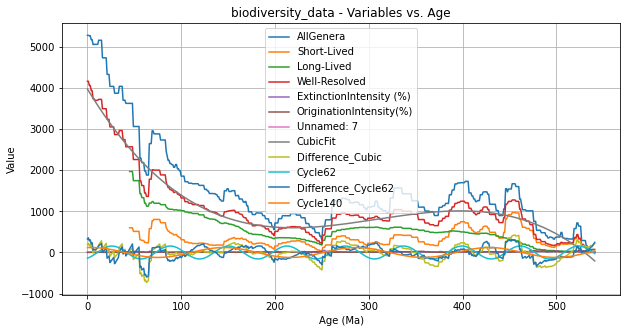

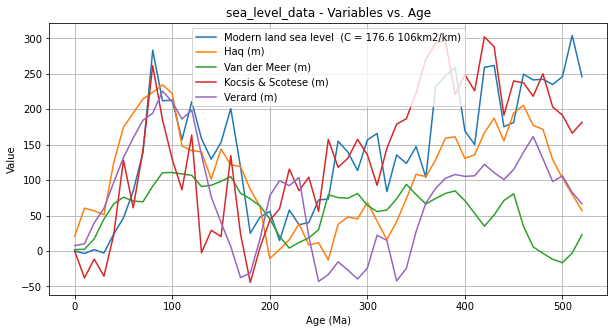

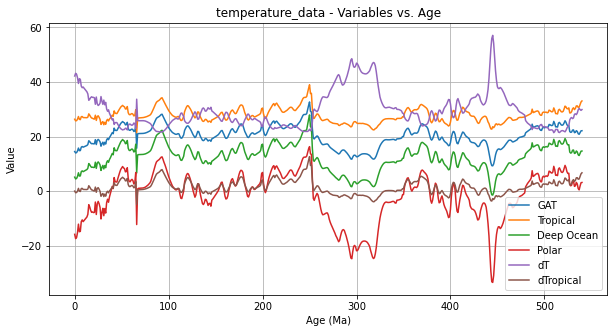

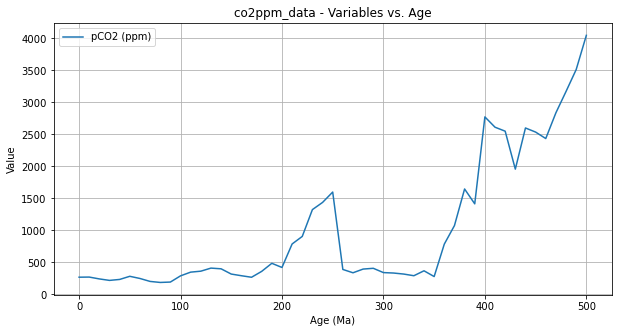

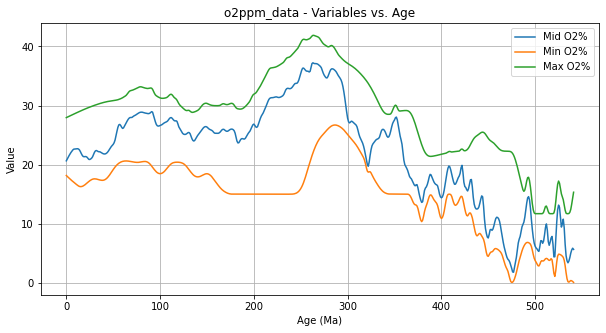

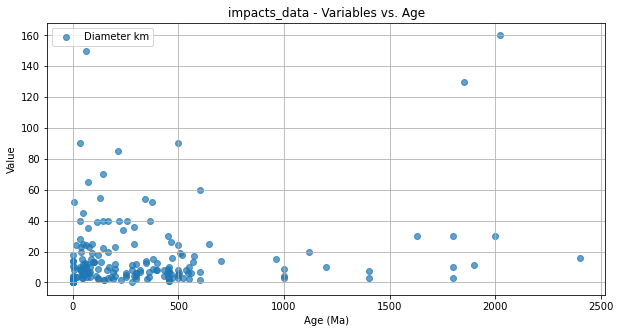

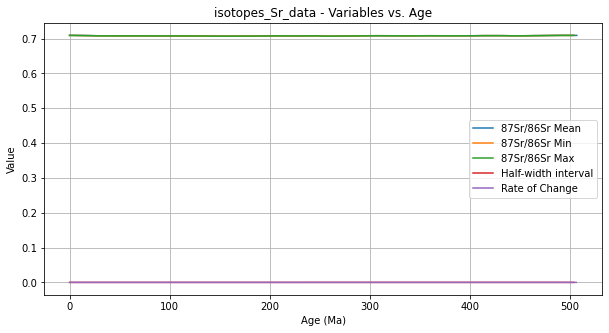

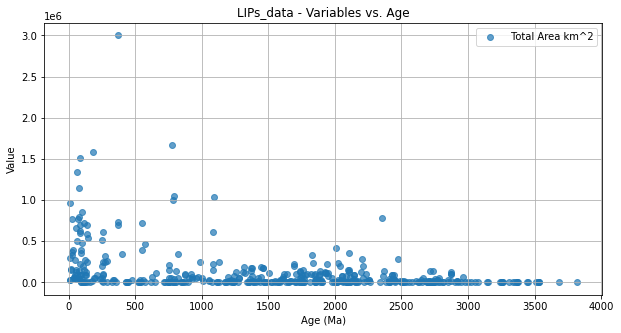

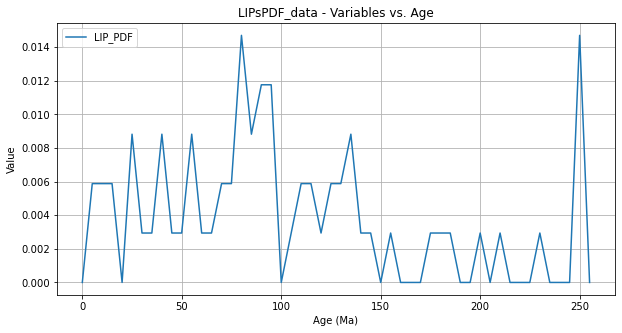

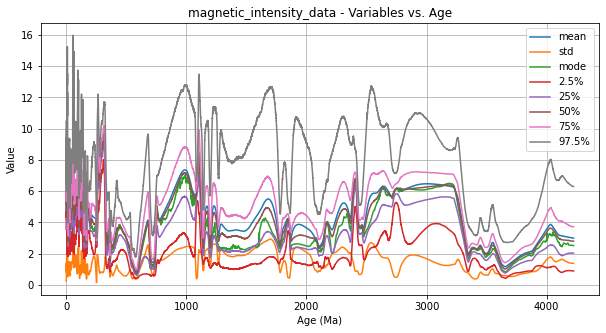

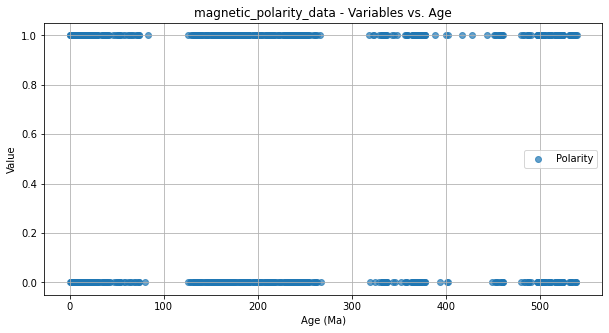

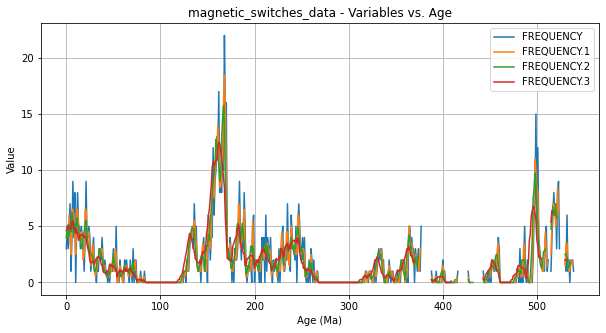

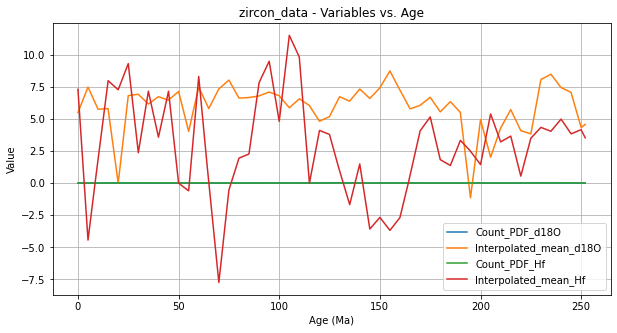

In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the cleaned dataset is used in the dictionary
datasets["magnetic_switches_data"] = magnetic_switches_data



# Step 4: Generate plots (scatter for discrete datasets, line plots for continuous)
def plot_data(df, title, age_col='Age'):
    """Generates a line plot for continuous data and scatter plot for discrete data."""
    if age_col not in df.columns:
        print(f"Skipping {title}: No Age column found.")
        return

    df = df.set_index(age_col)  # Set Age as index for plotting
    numeric_cols = df.select_dtypes(include=['number']).columns  # Only plot numeric columns

    if len(numeric_cols) == 0:
        print(f"Skipping {title}: No numeric variables found.")
        return

    plt.figure(figsize=(10, 5))
    
    # Use scatter plots for discrete datasets (Impacts, LIPs, Magnetic Polarity)
    if title in ["impacts_data", "LIPs_data", "magnetic_polarity_data"]:
        for col in numeric_cols:
            plt.scatter(df.index, df[col], label=col, alpha=0.7)  # Scatter plot
    else:
        for col in numeric_cols:
            plt.plot(df.index, df[col], label=col)  # Line plot for continuous data

    plt.xlabel("Age (Ma)")
    plt.ylabel("Value")
    plt.title(f"{title} - Variables vs. Age")
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 5: Plot all datasets
for key, df in datasets.items():
    plot_data(df, key)


#### GTS

In [90]:
import pandas as pd

# Updated GTS Data with precise period starts
gts_data = pd.DataFrame([
    {'period': 'quaternary', 'start': 2.58},
    {'period': 'neogene', 'start': 23.04},
    {'period': 'paleogene', 'start': 66},
    {'period': 'cretaceous', 'start': 143.1},
    {'period': 'jurassic', 'start': 201.4},
    {'period': 'triassic', 'start': 251.9}
])

# Compute duration based on the difference between consecutive periods
gts_data['end'] = gts_data['start'].shift(1, fill_value=0)  # Shift start values down to get end values
gts_data['duration'] = gts_data['start'] - gts_data['end']  # Compute duration
gts_data = gts_data[['period', 'start', 'end', 'duration']]  # Reorder columns

# Display updated DataFrame
print("\n--- Updated Geological Time Scale ---")
print(gts_data)



--- Updated Geological Time Scale ---
       period   start     end  duration
0  quaternary    2.58    0.00      2.58
1     neogene   23.04    2.58     20.46
2   paleogene   66.00   23.04     42.96
3  cretaceous  143.10   66.00     77.10
4    jurassic  201.40  143.10     58.30
5    triassic  251.90  201.40     50.50


In [91]:
import pandas as pd

# Updated Geological Time Scale Data with precise starts and corrected durations
gts_data = pd.DataFrame([
    {'period': 'quaternary', 'duration': 2.58, 'start': 2.58},
    {'period': 'neogene', 'duration': 20.46, 'start': 23.04},
    {'period': 'paleogene', 'duration': 42.96, 'start': 66.00},
    {'period': 'cretaceous', 'duration': 79.00, 'start': 145.00},  # Updated start
    {'period': 'jurassic', 'duration': 56.00, 'start': 201.00},  # Updated start
    {'period': 'triassic', 'duration': 50.50, 'start': 251.90}  # Added Triassic
])

# Display the updated DataFrame
print("\n--- Updated Geological Time Scale ---")
print(gts_data)



--- Updated Geological Time Scale ---
       period  duration   start
0  quaternary      2.58    2.58
1     neogene     20.46   23.04
2   paleogene     42.96   66.00
3  cretaceous     79.00  145.00
4    jurassic     56.00  201.00
5    triassic     50.50  251.90


#### TRUNCATE AND ADD GTS

##### alternative

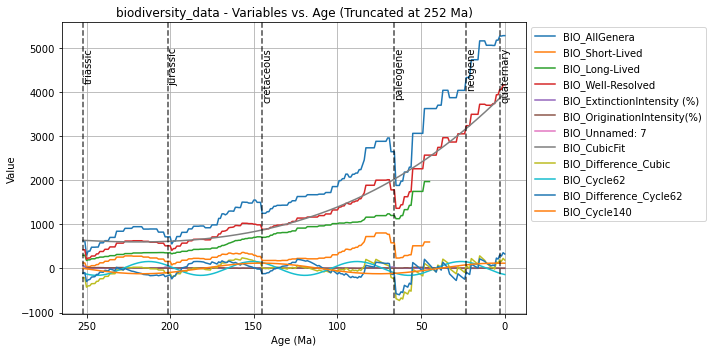

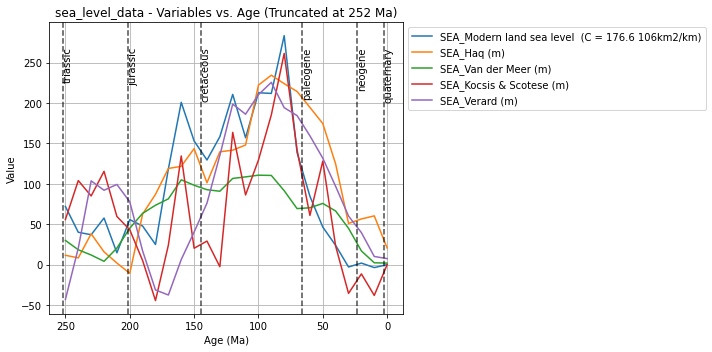

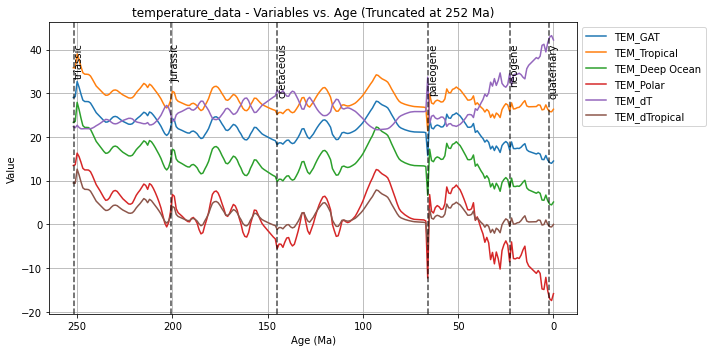

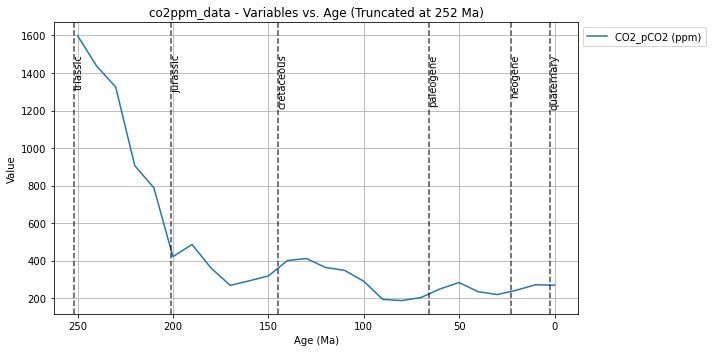

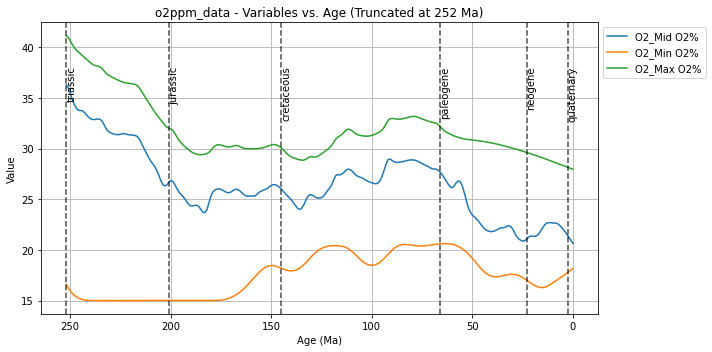

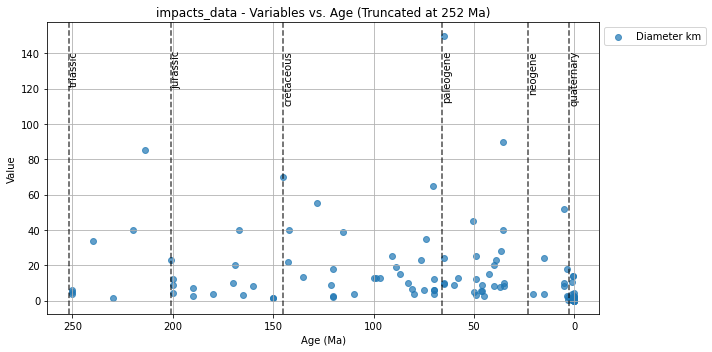

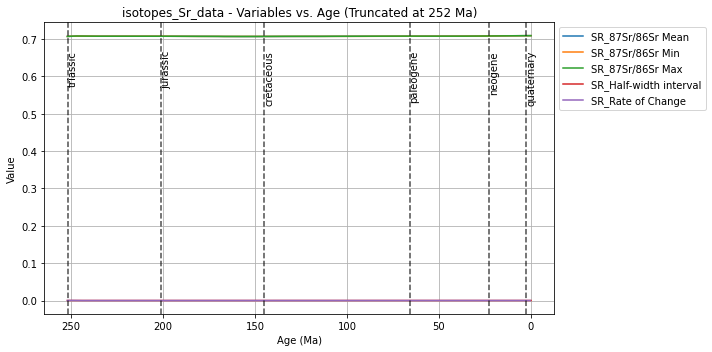

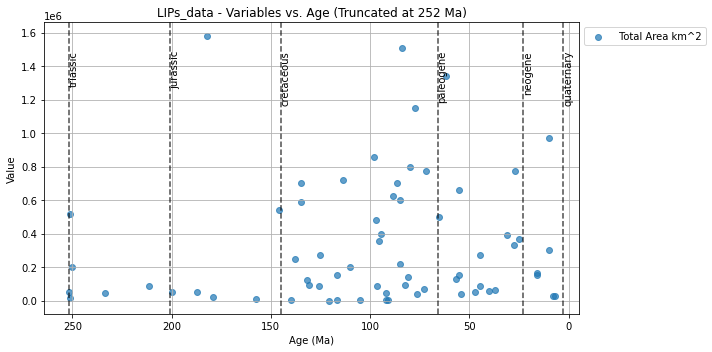

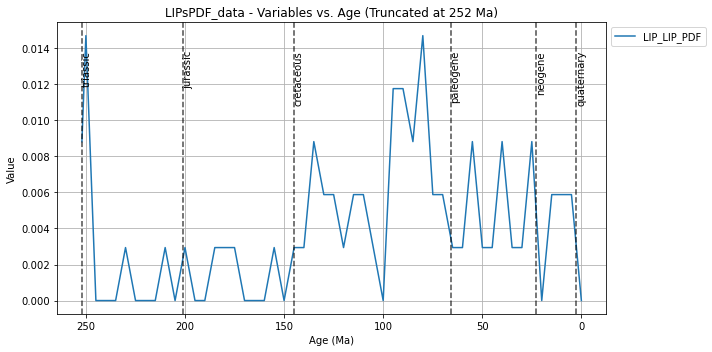

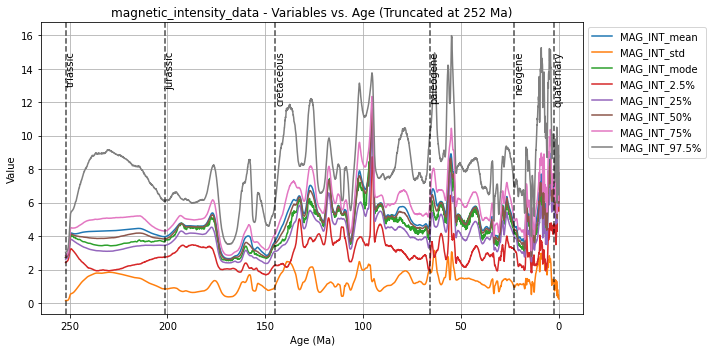

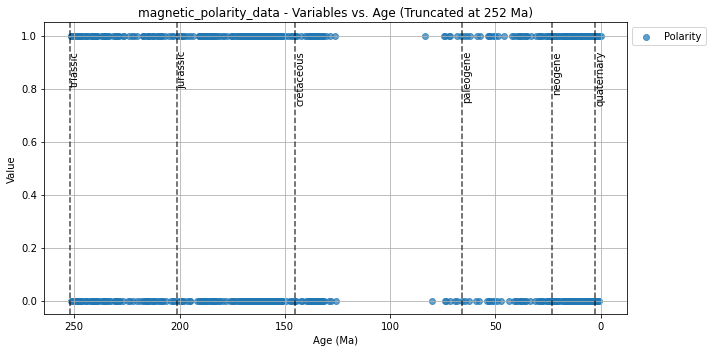

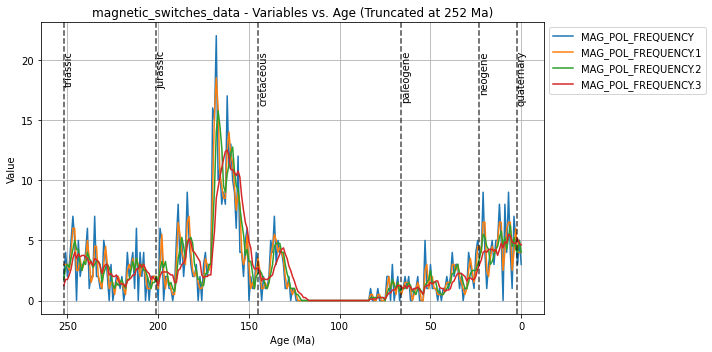

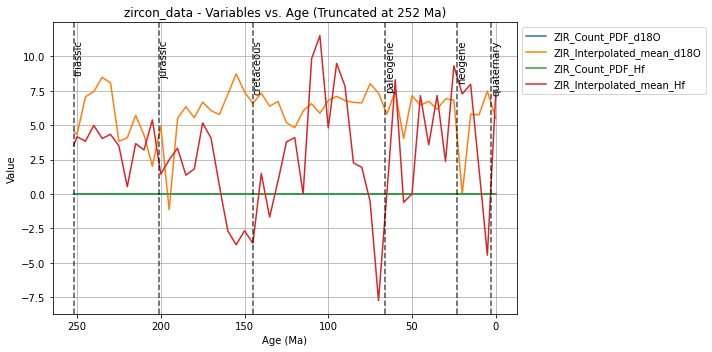

✅ Processed data saved to 'merged_truncated_data_with_prefix.csv'
      Age  BIO_AllGenera  BIO_Short-Lived  BIO_Long-Lived  BIO_Well-Resolved  \
0  252.00         626.62            124.5           299.0              423.5   
1  251.95         626.62            124.5           299.0              423.5   
2  251.90         626.62            124.5           299.0              423.5   
3  251.85         626.62            124.5           299.0              423.5   
4  251.80         626.62            124.5           299.0              423.5   

   BIO_ExtinctionIntensity (%)  BIO_OriginationIntensity(%)  BIO_Unnamed: 7  \
0                      51.3577                       2.5974             NaN   
1                      51.3577                       2.5974             NaN   
2                      51.3577                       2.5974             NaN   
3                      51.3577                       2.5974             NaN   
4                      51.3577                       2.597

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------ STEP 1: Truncate all datasets to Age ≤ 252 ------------------ #
def truncate_data(df, age_col='Age', max_age=252):
    """Filters the dataset to only include data with Age ≤ max_age."""
    if age_col in df.columns:
        return df[df[age_col] <= max_age].reset_index(drop=True)
    return df

for key in datasets:
    datasets[key] = truncate_data(datasets[key])

# ------------------ STEP 2: Add prefixes to dataset columns ------------------ #
def add_prefix_to_columns(df, prefix):
    """Add prefix to all columns except 'Age'."""
    return df.rename(columns={col: f"{prefix}_{col}" if col != "Age" else col for col in df.columns})

dataset_prefixes = {
    "biodiversity_data": "BIO",
    "sea_level_data": "SEA",
    "temperature_data": "TEM",
    "co2ppm_data": "CO2",
    "o2ppm_data": "O2",
    "isotopes_Sr_data": "SR",
    "magnetic_intensity_data": "MAG_INT",
    'magnetic_switches_data': 'MAG_POL',
    "LIPsPDF_data": "LIP",
    "zircon_data": "ZIR",
}

for key in datasets:
    if key in dataset_prefixes:
        datasets[key] = add_prefix_to_columns(datasets[key], dataset_prefixes[key])

# ------------------ STEP 3: Define Geological Time Scale (GTS) ------------------ #
gts_data = pd.DataFrame([
    {'period': 'quaternary', 'duration': 2.58, 'start': 2.58},
    {'period': 'neogene', 'duration': 20.46, 'start': 23.04},
    {'period': 'paleogene', 'duration': 42.96, 'start': 66.00},
    {'period': 'cretaceous', 'duration': 79.00, 'start': 145.00},
    {'period': 'jurassic', 'duration': 56.00, 'start': 201.00},
    {'period': 'triassic', 'duration': 50.50, 'start': 251.90}
])

# ------------------ STEP 4: Plot datasets with GTS markers ------------------ #
def plot_data_with_gts(df, title, age_col='Age'):
    """Plots dataset with GTS vertical markers."""
    if age_col not in df.columns:
        print(f"Skipping {title}: No Age column found.")
        return

    df = df.set_index(age_col)
    numeric_cols = df.select_dtypes(include=['number']).columns

    if len(numeric_cols) == 0:
        print(f"Skipping {title}: No numeric variables found.")
        return

    plt.figure(figsize=(10, 5))

    # Scatter plots for discrete datasets
    if title in ["impacts_data", "LIPs_data", "magnetic_polarity_data"]:
        for col in numeric_cols:
            plt.scatter(df.index, df[col], label=col, alpha=0.7)
    else:
        for col in numeric_cols:
            plt.plot(df.index, df[col], label=col)

    for _, row in gts_data.iterrows():
        if row['start'] <= 252:
            plt.axvline(x=row['start'], color='black', linestyle='--', alpha=0.7)
            plt.text(row['start'], plt.ylim()[1] * 0.9, row['period'],
                     rotation=90, verticalalignment='top')

    plt.gca().invert_xaxis()
    plt.xlabel("Age (Ma)")
    plt.ylabel("Value")
    plt.title(f"{title} - Variables vs. Age (Truncated at 252 Ma)")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot all datasets
for key, df in datasets.items():
    plot_data_with_gts(df, key)

# ------------------ STEP 5: Interpolate datasets onto uniform Age grid ------------------ #
# Create standardized Age grid
min_age = min(df["Age"].min() for df in datasets.values())
max_age = max(df["Age"].max() for df in datasets.values())
standard_age_grid = np.arange(min_age, max_age + 0.05, 0.05)

# Interpolate
interpolated_dfs = []
for key, df in datasets.items():
    df = df.groupby("Age").mean().reset_index()  # Average duplicates
    df = df.set_index("Age").reindex(standard_age_grid)  # Uniform grid
    df = df.interpolate(method='linear')  # Fill gaps
    df = df.reset_index().rename(columns={"index": "Age"})  # Back to regular index
    interpolated_dfs.append(df)

# ------------------ STEP 6: Merge datasets ------------------ #
merged_df = interpolated_dfs[0]
for df in interpolated_dfs[1:]:
    merged_df = pd.merge(merged_df, df, on="Age", how="outer")

merged_df = merged_df.sort_values(by="Age", ascending=False).reset_index(drop=True)

# ------------------ STEP 7: Save the processed data ------------------ #
merged_df.to_csv("merged_truncated_data_with_prefix.csv", index=False)
print("✅ Processed data saved to 'merged_truncated_data_with_prefix.csv'")
print(merged_df.head())


In [77]:
merged_df.describe()

Age  BIO_BIO_AllGenera  BIO_BIO_Short-Lived  \
count  5041.000000        5041.000000          4141.000000   
mean    126.000000        2029.926485           305.921106   
std      72.767784        1340.702680           173.509061   
min       0.000000         299.550000            28.500000   
25%      63.000000         929.694000           207.500000   
50%     126.000000        1548.475000           251.670000   
75%     189.000000        2885.100000           341.668500   
max     252.000000        5283.000000           805.000000   

       BIO_BIO_Long-Lived  BIO_BIO_Well-Resolved  \
count         4141.000000            5041.000000   
mean           748.039121            1453.003680   
std            411.999064            1007.989065   
min            180.000000             208.500000   
25%            359.152000             628.500000   
50%            706.000000            1067.500000   
75%           1030.370000            2003.500000   
max           1971.000000            4166.000000   

       BIO_BIO_ExtinctionIntensity (%)  BIO_BIO_OriginationIntensity(%)  \
count                      5041.000000                      5041.000000   
mean                          6.525543                        10.145227   
std                           5.996236                         4.520896   
min                           1.138500                         2.597400   
25%                           3.402700                         6.819400   
50%                           4.911700                         9.515600   
75%                           6.631500                        12.228800   
max                          51.357700                        25.022100   

       BIO_BIO_Unnamed: 7  BIO_BIO_CubicFit  BIO_BIO_Difference_Cubic  ...  \
count                 0.0       5041.000000               5041.000000  ...   
mean                  NaN       1471.665172                -18.661492  ...   
std                   NaN        973.131784                172.026406  ...   
min                   NaN        601.460000               -728.900000  ...   
25%                   NaN        640.640000                -57.353500  ...   
50%                   NaN       1053.700000                  0.924000  ...   
75%                   NaN       2093.400000                 68.380000  ...   
max                   NaN       3976.300000                286.000000  ...   

       MAG_INT_MAG_INT_97.5%     Polarity    FREQUENCY  FREQUENCY.1  \
count            5040.000000  5041.000000  5041.000000  5041.000000   
mean                8.038241     0.381571     2.628943     2.627157   
std                 2.200843     0.395322     3.049021     2.896656   
min                 3.038123     0.000000     0.000000     0.000000   
25%                 6.561949     0.000000     0.500000     0.700000   
50%                 7.912680     0.250000     1.800000     1.800000   
75%                 8.948875     0.772727     3.700000     3.500000   
max                15.926744     1.000000    22.000000    18.500000   

       FREQUENCY.2  FREQUENCY.3  ZIR_ZIR_Count_PDF_d18O  \
count  5041.000000  5041.000000             5041.000000   
mean      2.619594     2.592082                0.003967   
std       2.730639     2.548273                0.004392   
min       0.000000     0.000000                0.000000   
25%       0.900000     0.987500                0.000889   
50%       2.000000     2.037500                0.001891   
75%       3.487500     3.525000                0.005792   
max      15.750000    12.500000                0.027098   

       ZIR_ZIR_Interpolated_mean_d18O  ZIR_ZIR_Count_PDF_Hf  \
count                     5041.000000           5041.000000   
mean                         5.992021              0.003902   
std                          1.581644              0.003908   
min                         -1.140000              0.000000   
25%                          5.537165              0.000679   
50%                          6.401837              0.00273

In [98]:
print(corr_matrix.columns)



Index(['Age', 'BIO_AllGenera', 'BIO_Short-Lived', 'BIO_Long-Lived',
       'BIO_Well-Resolved', 'BIO_ExtinctionIntensity (%)',
       'BIO_OriginationIntensity(%)', 'BIO_Unnamed: 7', 'BIO_CubicFit',
       'BIO_Difference_Cubic', 'BIO_Cycle62', 'BIO_Difference_Cycle62',
       'BIO_Cycle140', 'SEA_Modern land sea level  (C = 176.6 106km2/km)',
       'SEA_Haq (m)', 'SEA_Van der Meer (m)', 'SEA_Kocsis & Scotese (m)',
       'SEA_Verard (m)', 'TEM_GAT', 'TEM_Tropical', 'TEM_Deep Ocean',
       'TEM_Polar', 'TEM_dT', 'TEM_dTropical', 'CO2_pCO2 (ppm)', 'O2_Mid O2%',
       'O2_Min O2%', 'O2_Max O2%', 'Diameter km', 'SR_87Sr/86Sr Mean',
       'SR_87Sr/86Sr Min', 'SR_87Sr/86Sr Max', 'SR_Half-width interval',
       'SR_Rate of Change', ' Total Area km^2', 'LIP_LIP_PDF', 'MAG_INT_mean',
       'MAG_INT_std', 'MAG_INT_mode', 'MAG_INT_2.5%', 'MAG_INT_25%',
       'MAG_INT_50%', 'MAG_INT_75%', 'MAG_INT_97.5%', 'Polarity',
       'MAG_POL_FREQUENCY', 'MAG_POL_FREQUENCY.1', 'MAG_POL_FREQUENCY.2',

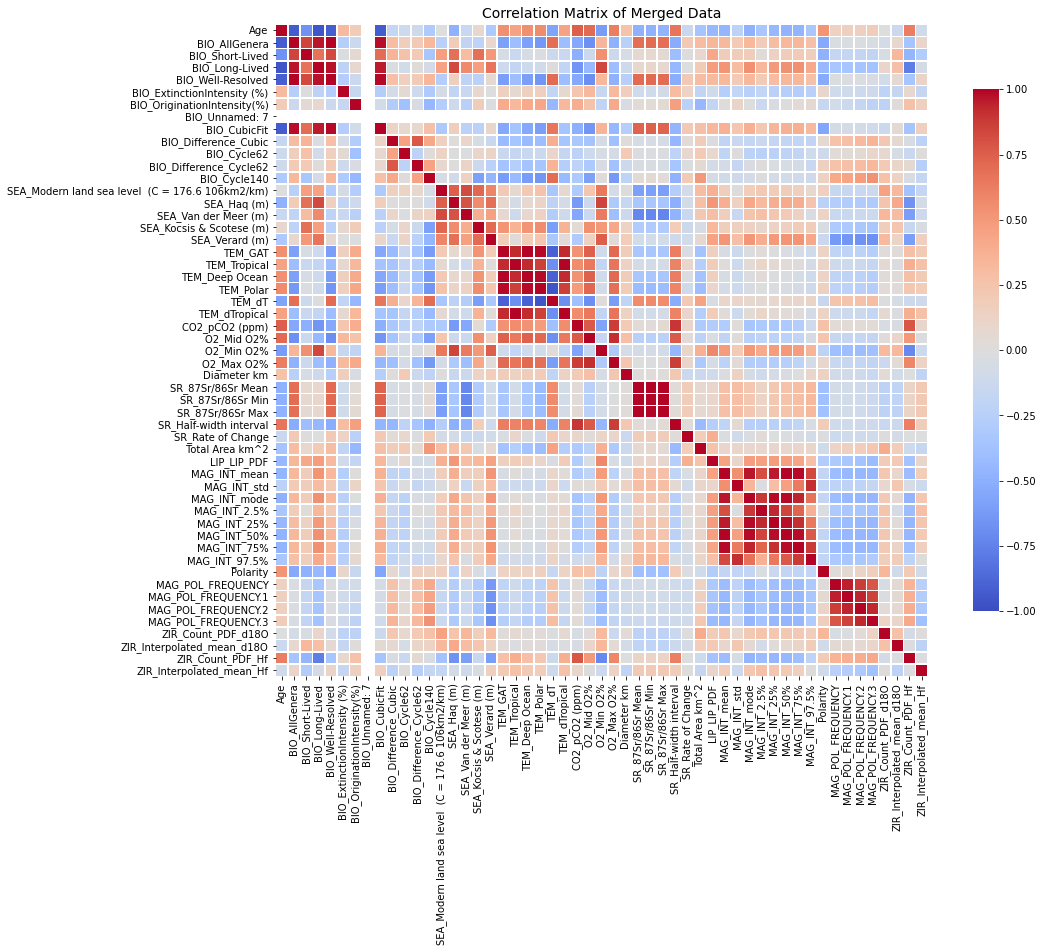

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = merged_df.corr()

# Ensure all variables are displayed
plt.figure(figsize=(16, 12))

# Plot heatmap with better visualization settings
sns.heatmap(
    corr_matrix, 
    cmap="coolwarm", 
    annot=False,  # Set to True if you want numerical values displayed
    fmt=".2f", 
    linewidths=0.5, 
    vmin=-1, vmax=1,  # Ensure full correlation range is shown
    square=True,  # Keeps it visually uniform
    cbar_kws={"shrink": 0.8},  # Adjust colorbar size
)

# Title and display
plt.title("Correlation Matrix of Merged Data", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.yticks(rotation=0)
plt.show()


### CORRS

In [103]:
import pandas as pd
import itertools

# Step 1: Compute correlation matrix
corr_matrix = merged_df.corr()

# Step 2: Extract variable prefixes
def get_prefix(column_name):
    """Extracts the prefix from column names before the first underscore."""
    return column_name.split("_")[0] if "_" in column_name else None

# Step 3: Identify cross-domain correlations
cross_domain_corrs = []

columns = corr_matrix.columns
column_pairs = itertools.combinations(columns, 2)  # Generate all column pairs

for col1, col2 in column_pairs:
    prefix1, prefix2 = get_prefix(col1), get_prefix(col2)

    # Ensure they belong to different categories and are not 'Age'
    if prefix1 and prefix2 and prefix1 != prefix2 and "Age" not in [prefix1, prefix2]:
        correlation_value = corr_matrix.loc[col1, col2]

        # Skip NaN correlations (if any exist)
        if not pd.isna(correlation_value):
            cross_domain_corrs.append((col1, col2, correlation_value))

# Step 4: Convert results to a DataFrame
cross_corr_df = pd.DataFrame(cross_domain_corrs, columns=["Variable 1", "Variable 2", "Correlation"])

# Step 5: Sort by absolute correlation strength (high correlations first)
cross_corr_df["Abs_Correlation"] = cross_corr_df["Correlation"].abs()
cross_corr_df = cross_corr_df.sort_values(by="Abs_Correlation", ascending=False).drop(columns=["Abs_Correlation"])

# Step 6: Display top correlations
print("\n✅ Top 20 Cross-Domain Correlations:\n")
print(cross_corr_df.head(20))

# Step 7: Save results to CSV
cross_corr_df.to_csv("cross_domain_correlations.csv", index=False)
print("\n✅ Cross-domain correlations saved as 'cross_domain_correlations.csv'.")



✅ Top 20 Cross-Domain Correlations:

               Variable 1              Variable 2  Correlation
729        CO2_pCO2 (ppm)  SR_Half-width interval     0.896336
795            O2_Max O2%  SR_Half-width interval     0.868245
725        CO2_pCO2 (ppm)              O2_Max O2%     0.867994
447           SEA_Haq (m)              O2_Min O2%     0.850504
87         BIO_Long-Lived              O2_Min O2%     0.839061
75         BIO_Long-Lived             SEA_Haq (m)     0.834135
746        CO2_pCO2 (ppm)        ZIR_Count_PDF_Hf     0.788550
723        CO2_pCO2 (ppm)              O2_Mid O2%     0.771547
751            O2_Mid O2%  SR_Half-width interval     0.767890
109        BIO_Long-Lived        ZIR_Count_PDF_Hf    -0.766614
543        SEA_Verard (m)              O2_Min O2%     0.756909
238          BIO_CubicFit        SR_87Sr/86Sr Min     0.745693
568               TEM_GAT              O2_Mid O2%     0.743312
620        TEM_Deep Ocean              O2_Mid O2%     0.743312
237          BIO_

### NORMALIZE

In [110]:
import pandas as pd
import numpy as np
import itertools

# Step 1: Normalize all variables (except "Age") to range 0-1
normalized_df = merged_df.copy()
for col in normalized_df.columns:
    if col != "Age":
        min_val, max_val = normalized_df[col].min(), normalized_df[col].max()
        if min_val != max_val:  # Avoid division by zero
            normalized_df[col] = (normalized_df[col] - min_val) / (max_val - min_val)

# Step 2: Compute correlation matrix on the normalized data
corr_matrix = normalized_df.corr()

# Step 3: Extract variable prefixes
def get_prefix(column_name):
    return column_name.split("_")[0] if "_" in column_name else None

# Step 4: Identify cross-domain correlations
cross_domain_corrs = []
columns = list(corr_matrix.columns)

for col1, col2 in itertools.combinations(columns, 2):  # Check all pairs
    prefix1, prefix2 = get_prefix(col1), get_prefix(col2)
    
    # Ensure they have different prefixes and are not "Age"
    if prefix1 and prefix2 and prefix1 != prefix2:
        cross_domain_corrs.append((col1, col2, corr_matrix.loc[col1, col2]))

# Step 5: Convert results to a DataFrame
cross_corr_df = pd.DataFrame(cross_domain_corrs, columns=["Variable 1", "Variable 2", "Correlation"])

# Step 6: Sort by absolute correlation strength (highest first)
cross_corr_df = cross_corr_df.sort_values(by="Correlation", key=abs, ascending=False)

# Step 7: Save and display results
print("\nTop 20 Cross-Domain Correlations (Normalized Data):")
print(cross_corr_df.head(20))  # Show strongest correlations

cross_corr_df.to_csv("cross_domain_correlations_normalized.csv", index=False)  # Save for further analysis
normalized_df.to_csv("normalized_merged_data.csv", index=False)  # Save normalized dataset



Top 20 Cross-Domain Correlations (Normalized Data):
               Variable 1              Variable 2  Correlation
766        CO2_pCO2 (ppm)  SR_Half-width interval     0.896336
832            O2_Max O2%  SR_Half-width interval     0.868245
762        CO2_pCO2 (ppm)              O2_Max O2%     0.867994
484           SEA_Haq (m)              O2_Min O2%     0.850504
87         BIO_Long-Lived              O2_Min O2%     0.839061
75         BIO_Long-Lived             SEA_Haq (m)     0.834135
783        CO2_pCO2 (ppm)        ZIR_Count_PDF_Hf     0.788550
760        CO2_pCO2 (ppm)              O2_Mid O2%     0.771547
788            O2_Mid O2%  SR_Half-width interval     0.767890
109        BIO_Long-Lived        ZIR_Count_PDF_Hf    -0.766614
580        SEA_Verard (m)              O2_Min O2%     0.756909
275          BIO_CubicFit        SR_87Sr/86Sr Min     0.745693
657        TEM_Deep Ocean              O2_Mid O2%     0.743312
605               TEM_GAT              O2_Mid O2%     0.743312
27

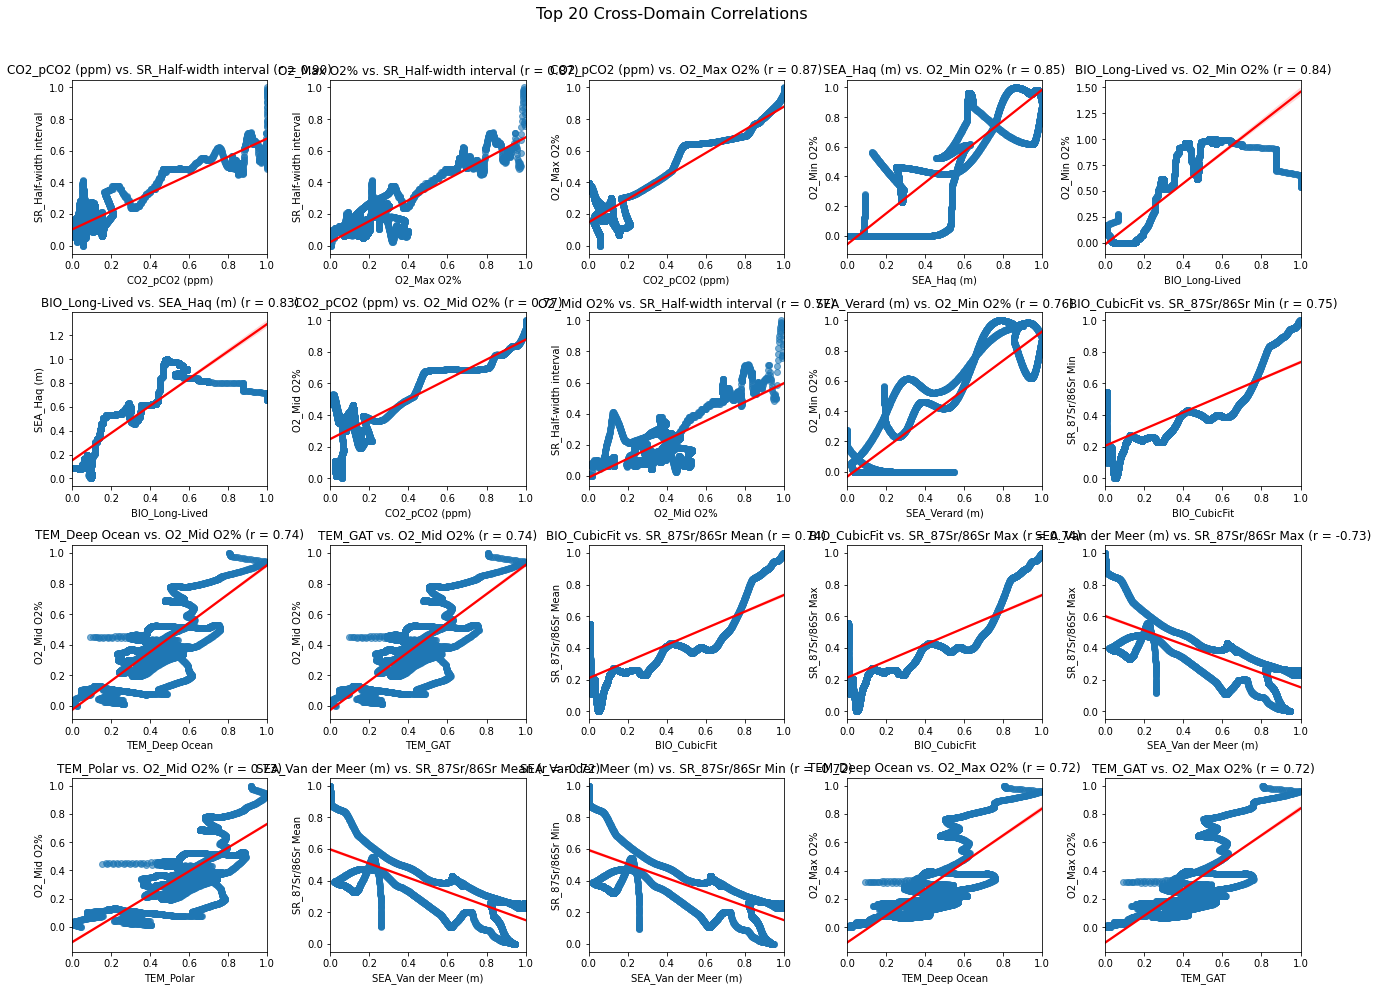

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the normalized dataset (if not already in memory)
normalized_df = pd.read_csv("normalized_merged_data.csv")

# Load the cross-domain correlation file
cross_corr_df = pd.read_csv("cross_domain_correlations_normalized.csv")

# Select the top 20 cross-domain correlations
top_corrs = cross_corr_df.head(20)

# Set up the plot grid (4 rows, 5 columns for 20 correlations)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(18, 14))
fig.suptitle("Top 20 Cross-Domain Correlations", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each top correlation pair
for i, (var1, var2, corr) in enumerate(zip(top_corrs["Variable 1"], top_corrs["Variable 2"], top_corrs["Correlation"])):
    ax = axes[i]
    sns.regplot(x=normalized_df[var1], y=normalized_df[var2], ax=ax, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
    ax.set_title(f"{var1} vs. {var2} (r = {corr:.2f})")
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


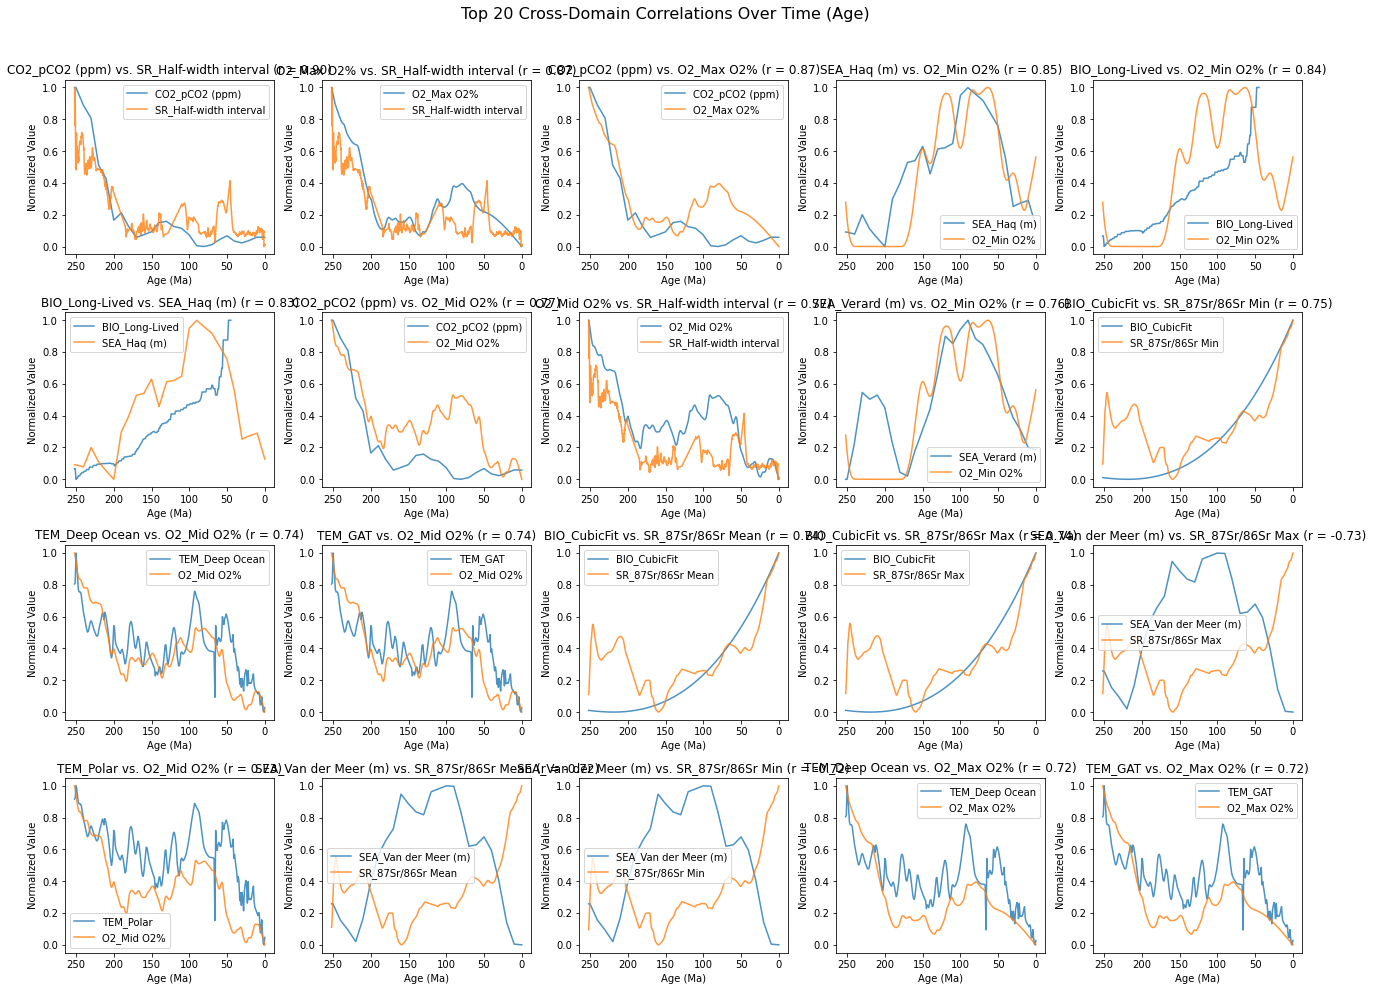

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the normalized dataset (if not already in memory)
normalized_df = pd.read_csv("normalized_merged_data.csv")

# Load the cross-domain correlation file
cross_corr_df = pd.read_csv("cross_domain_correlations_normalized.csv")

# Select the top 20 cross-domain correlations
top_corrs = cross_corr_df.head(20)

# Set up the plot grid (4 rows, 5 columns for 20 correlations)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(18, 14))
fig.suptitle("Top 20 Cross-Domain Correlations Over Time (Age)", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot time-series for each top correlation pair
for i, (var1, var2, corr) in enumerate(zip(top_corrs["Variable 1"], top_corrs["Variable 2"], top_corrs["Correlation"])):
    ax = axes[i]
    
    # Plot both variables on the same y-axis
    sns.lineplot(x=normalized_df["Age"], y=normalized_df[var1], ax=ax, label=var1, alpha=0.8)
    sns.lineplot(x=normalized_df["Age"], y=normalized_df[var2], ax=ax, label=var2, alpha=0.8)
    
    ax.set_title(f"{var1} vs. {var2} (r = {corr:.2f})")
    ax.set_xlabel("Age (Ma)")
    ax.set_ylabel("Normalized Value")
    
    # Reverse X-axis to align with geological time convention
    ax.invert_xaxis()
    
    # Add legend
    ax.legend()

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


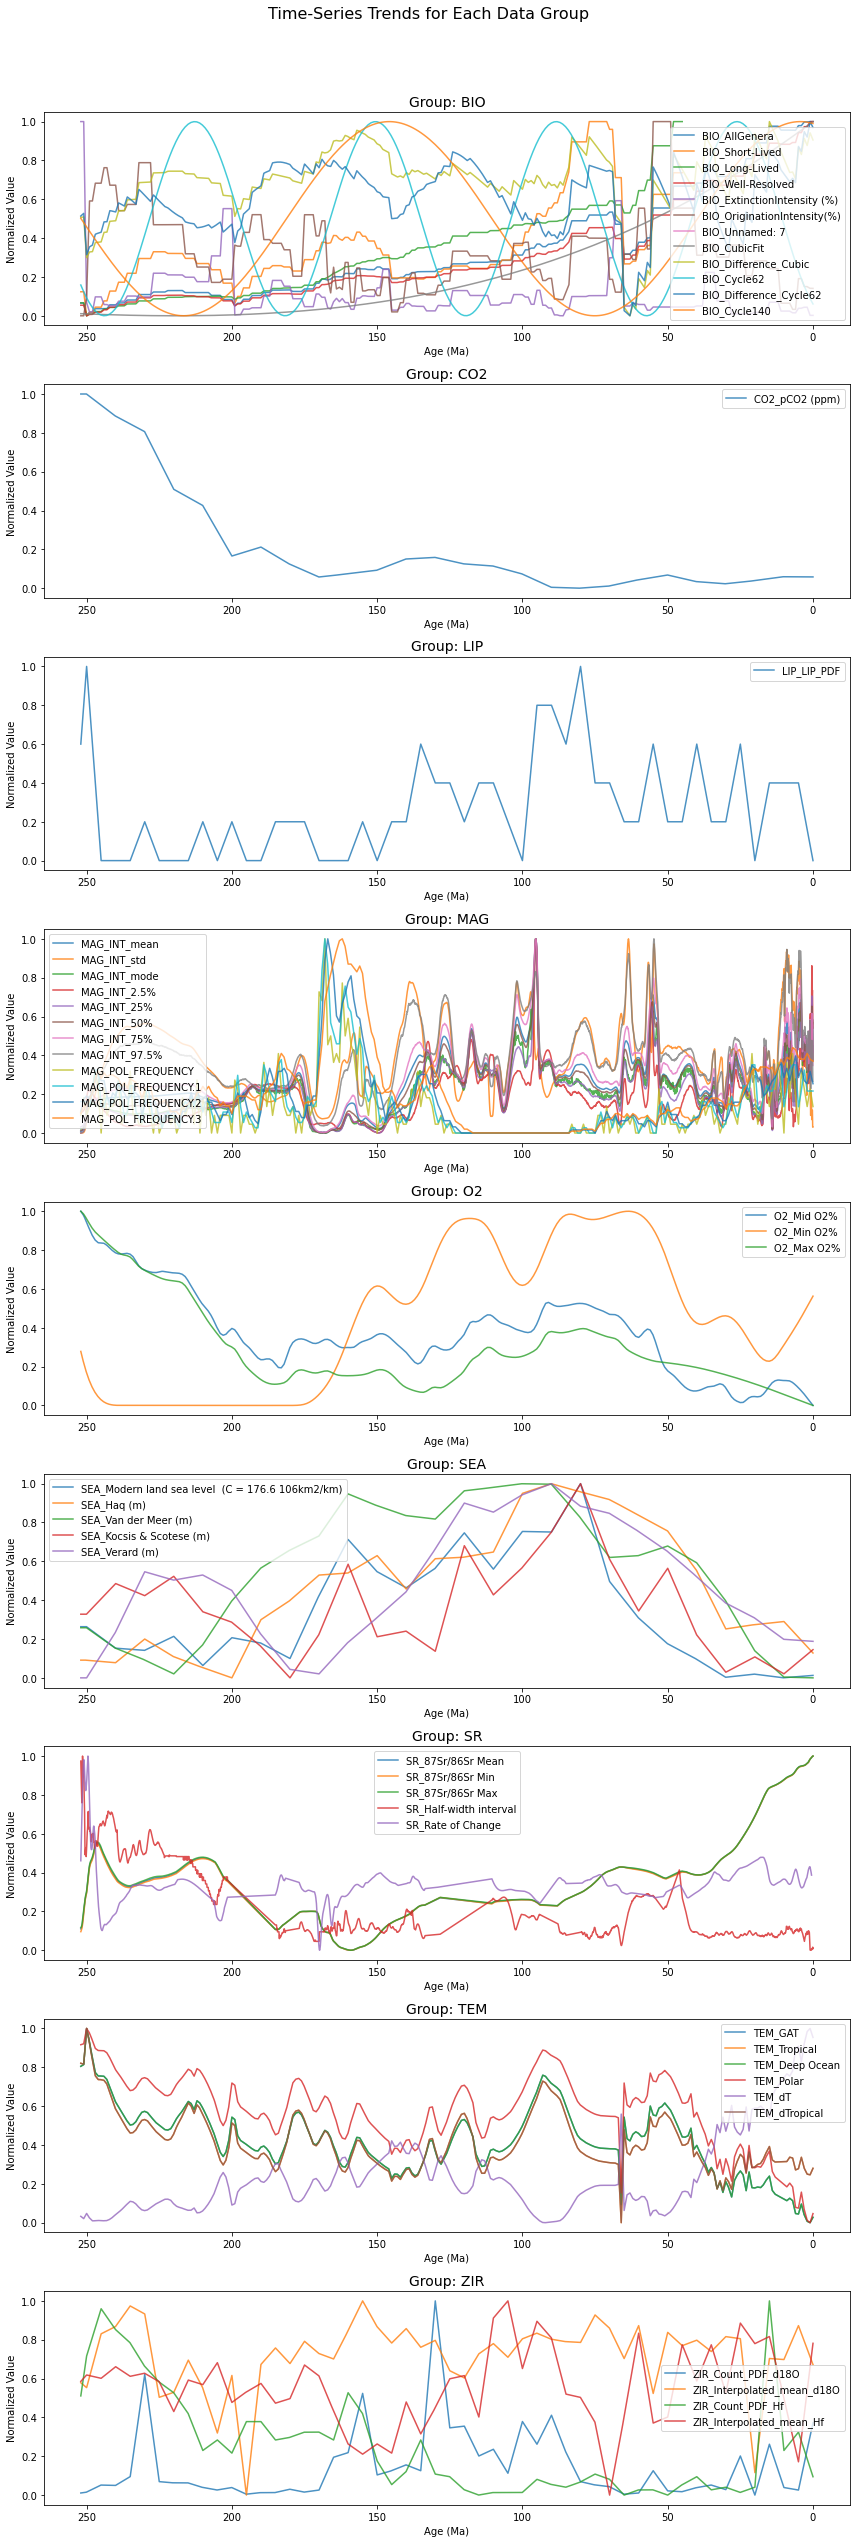

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the normalized dataset
normalized_df = pd.read_csv("normalized_merged_data.csv")

# Extract unique prefixes (dataset groups) while handling missing prefixes safely
def get_prefix(column_name):
    parts = column_name.split("_")
    return parts[0] if len(parts) > 1 else None  # Only return prefix if it exists

prefixes = {get_prefix(col) for col in normalized_df.columns if col != "Age"}
prefixes.discard(None)  # Remove None values

# Step 1: Create a plot for each prefix (dataset group)
fig, axes = plt.subplots(nrows=len(prefixes), figsize=(12, len(prefixes) * 4))
fig.suptitle("Time-Series Trends for Each Data Group", fontsize=16)

# Ensure axes is iterable even if there's only one prefix
if len(prefixes) == 1:
    axes = [axes]

# Step 2: Plot each dataset group
for ax, prefix in zip(axes, sorted(prefixes)):
    # Select columns that belong to this prefix
    group_columns = [col for col in normalized_df.columns if col.startswith(prefix)]
    
    # Plot all variables in this group
    for col in group_columns:
        sns.lineplot(x=normalized_df["Age"], y=normalized_df[col], ax=ax, label=col, alpha=0.8)

    ax.set_title(f"Group: {prefix}", fontsize=14)
    ax.set_xlabel("Age (Ma)")
    ax.set_ylabel("Normalized Value")
    
    # Reverse X-axis (oldest age on left, present on right)
    ax.invert_xaxis()
    
    ax.legend()

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


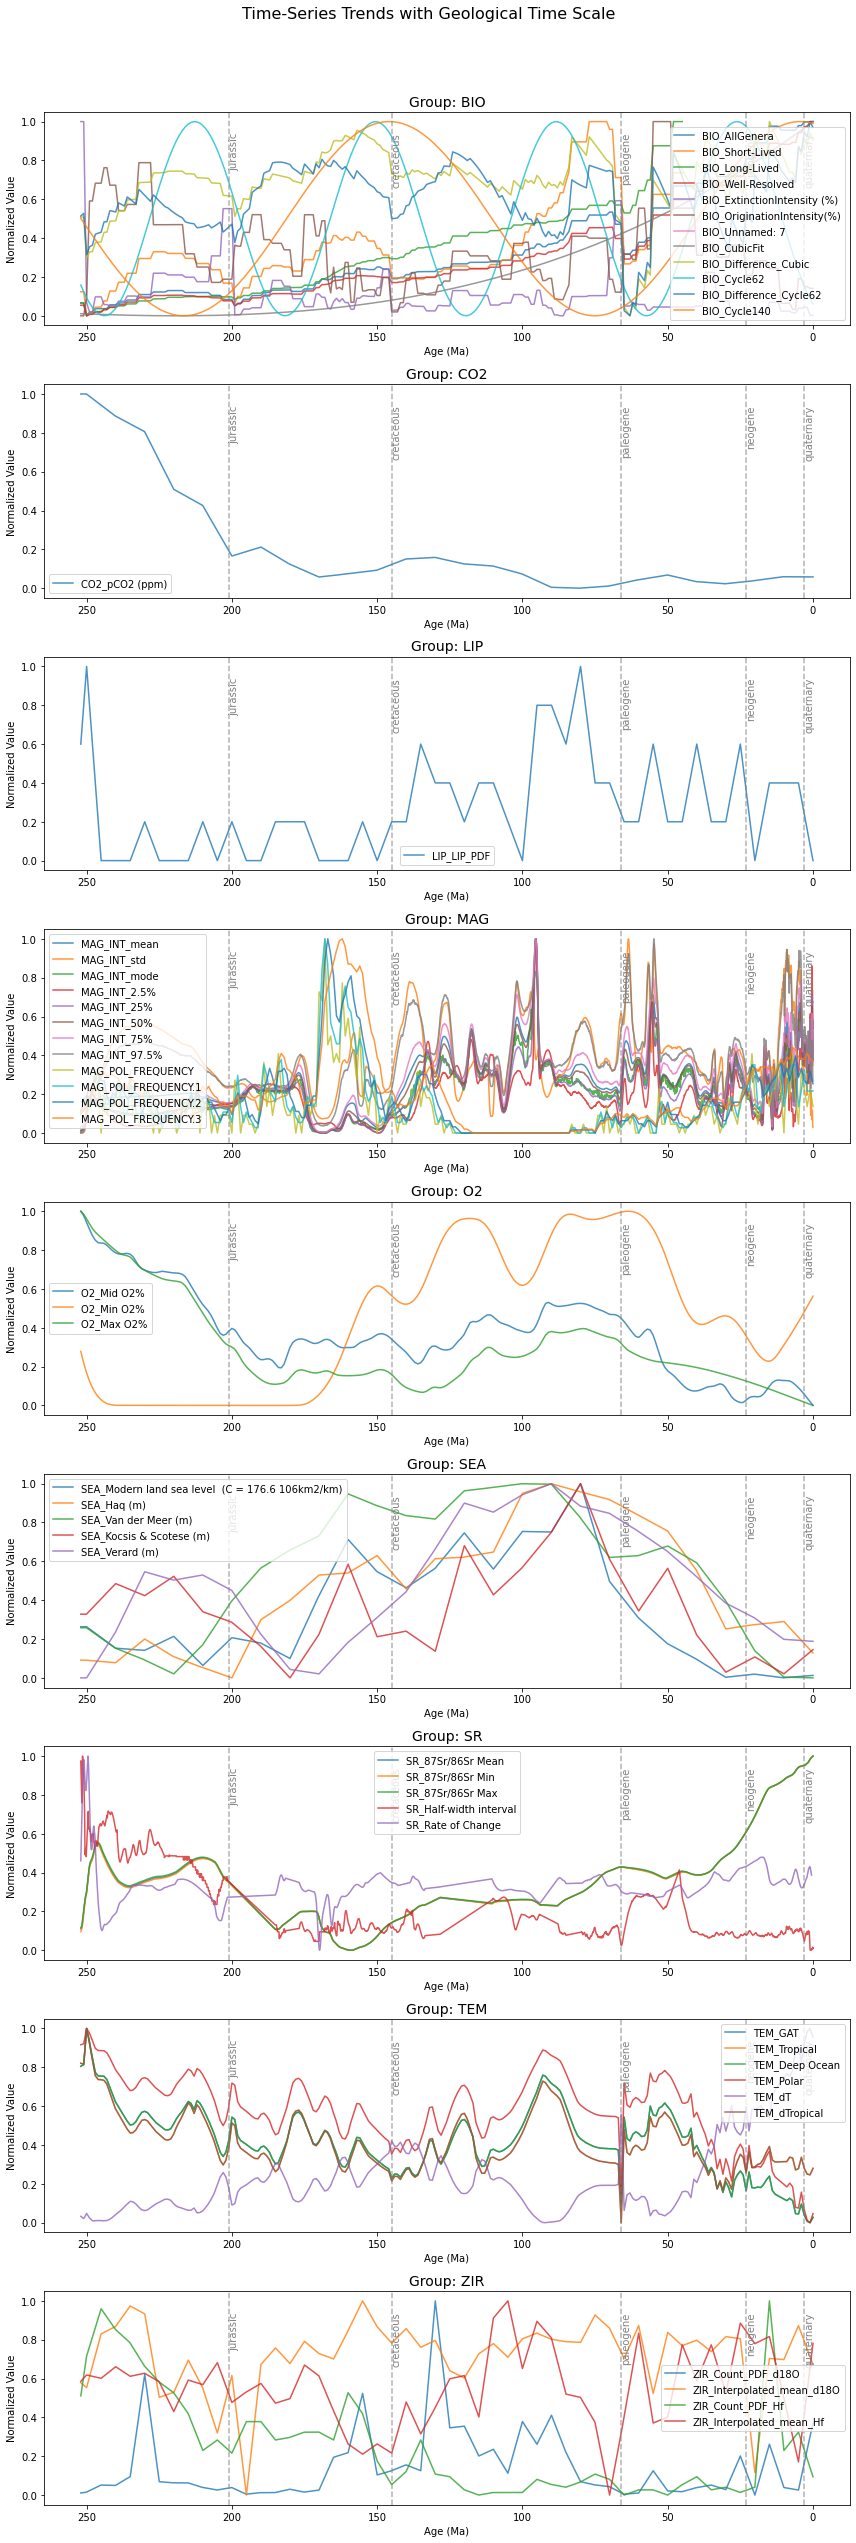

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the normalized dataset
normalized_df = pd.read_csv("normalized_merged_data.csv")

# Extract unique prefixes (dataset groups) while handling missing prefixes safely
def get_prefix(column_name):
    parts = column_name.split("_")
    return parts[0] if len(parts) > 1 else None  # Only return prefix if it exists

prefixes = {get_prefix(col) for col in normalized_df.columns if col != "Age"}
prefixes.discard(None)  # Remove None values

# Define Geological Time Scale (GTS) Data for Vertical Markers
gts_data = pd.DataFrame([
    {'period': 'quaternary', 'duration': 3, 'start': 3},
    {'period': 'neogene', 'duration': 20, 'start': 23},
    {'period': 'paleogene', 'duration': 43, 'start': 66},
    {'period': 'cretaceous', 'duration': 79, 'start': 145},
    {'period': 'jurassic', 'duration': 56, 'start': 201}
])

# Step 1: Create a plot for each prefix (dataset group)
fig, axes = plt.subplots(nrows=len(prefixes), figsize=(12, len(prefixes) * 4))
fig.suptitle("Time-Series Trends with Geological Time Scale", fontsize=16)

# Ensure axes is iterable even if there's only one prefix
if len(prefixes) == 1:
    axes = [axes]

# Step 2: Plot each dataset group with GTS markers
for ax, prefix in zip(axes, sorted(prefixes)):
    # Select columns that belong to this prefix
    group_columns = [col for col in normalized_df.columns if col.startswith(prefix)]
    
    # Plot all variables in this group
    for col in group_columns:
        sns.lineplot(x=normalized_df["Age"], y=normalized_df[col], ax=ax, label=col, alpha=0.8)

    ax.set_title(f"Group: {prefix}", fontsize=14)
    ax.set_xlabel("Age (Ma)")
    ax.set_ylabel("Normalized Value")
    
    # Reverse X-axis (oldest age on left, present on right)
    ax.invert_xaxis()
    
    # Add Geological Time Scale (GTS) markers
    for _, row in gts_data.iterrows():
        ax.axvline(x=row["start"], color='gray', linestyle='--', alpha=0.6)
        ax.text(row["start"], ax.get_ylim()[1] * 0.9, row["period"], rotation=90,
                verticalalignment='top', fontsize=10, color='gray')

    ax.legend()

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [113]:
# Create a new column for the max-min difference
normalized_df['O2_Range'] = normalized_df['O2_Max O2%'] - normalized_df['O2_Min O2%']

# Display the first few rows to verify
print(normalized_df[['O2_Max O2%', 'O2_Min O2%', 'O2_Range']].head())

   O2_Max O2%  O2_Min O2%  O2_Range
0    1.000000    0.278170  0.721830
1    0.999242    0.275139  0.724103
2    0.998485    0.272109  0.726376
3    0.997727    0.269078  0.728649
4    0.996970    0.266047  0.730923


### CREATING RANGES

   O2_Max O2%  O2_Mid O2%  O2_Min O2%  O2_Range  O2_Range_Normalized
0    1.000000    1.000000    0.278170  0.721830             0.930485
1    0.999242    0.998872    0.275139  0.724103             0.931869
2    0.998485    0.997744    0.272109  0.726376             0.933254
3    0.997727    0.996615    0.269078  0.728649             0.934638
4    0.996970    0.995487    0.266047  0.730923             0.936023


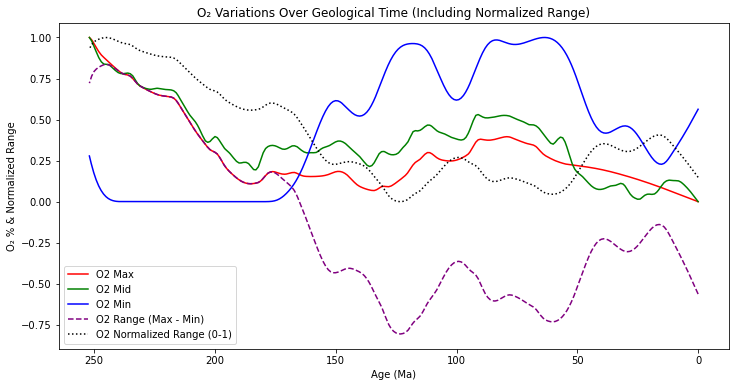

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate O2 Range (Max - Min Difference)
normalized_df['O2_Range'] = normalized_df['O2_Max O2%'] - normalized_df['O2_Min O2%']

# Normalize O2_Range to be between 0 and 1
o2_min = normalized_df['O2_Range'].min()
o2_max = normalized_df['O2_Range'].max()
normalized_df['O2_Range_Normalized'] = (normalized_df['O2_Range'] - o2_min) / (o2_max - o2_min)

# Display the first few rows to verify the new column
print(normalized_df[['O2_Max O2%', 'O2_Mid O2%', 'O2_Min O2%', 'O2_Range', 'O2_Range_Normalized']].head())

# Create a line plot for O2 values over Age
plt.figure(figsize=(12, 6))

sns.lineplot(x=normalized_df['Age'], y=normalized_df['O2_Max O2%'], label="O2 Max", color="red")
sns.lineplot(x=normalized_df['Age'], y=normalized_df['O2_Mid O2%'], label="O2 Mid", color="green")
sns.lineplot(x=normalized_df['Age'], y=normalized_df['O2_Min O2%'], label="O2 Min", color="blue")
sns.lineplot(x=normalized_df['Age'], y=normalized_df['O2_Range'], label="O2 Range (Max - Min)", color="purple", linestyle="dashed")
sns.lineplot(x=normalized_df['Age'], y=normalized_df['O2_Range_Normalized'], label="O2 Normalized Range (0-1)", color="black", linestyle="dotted")

# Customize the plot
plt.title("O₂ Variations Over Geological Time (Including Normalized Range)")
plt.xlabel("Age (Ma)")
plt.ylabel("O₂ % & Normalized Range")
plt.gca().invert_xaxis()  # Reverse x-axis to show the oldest time on the left
plt.legend()
plt.show()


   SR_87Sr/86Sr Max  SR_87Sr/86Sr Min  SR_Range  SR_Range_Normalized
0          0.116999          0.095670  0.021329             0.969434
1          0.117804          0.097274  0.020530             0.934624
2          0.118609          0.098878  0.019730             0.899814
3          0.120149          0.101148  0.019001             0.868058
4          0.121689          0.103418  0.018271             0.836303


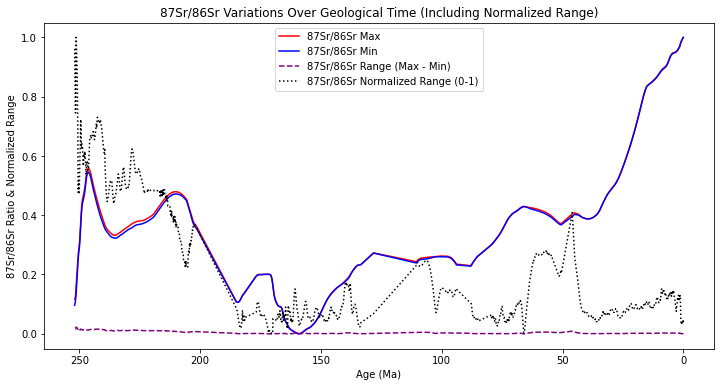

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Sr Range (Max - Min Difference)
normalized_df['SR_Range'] = normalized_df['SR_87Sr/86Sr Max'] - normalized_df['SR_87Sr/86Sr Min']

# Normalize SR_Range to be between 0 and 1
sr_min = normalized_df['SR_Range'].min()
sr_max = normalized_df['SR_Range'].max()
normalized_df['SR_Range_Normalized'] = (normalized_df['SR_Range'] - sr_min) / (sr_max - sr_min)

# Display the first few rows to verify the calculations
print(normalized_df[['SR_87Sr/86Sr Max', 'SR_87Sr/86Sr Min', 'SR_Range', 'SR_Range_Normalized']].head())

# Create a line plot for Sr values over Age
plt.figure(figsize=(12, 6))

sns.lineplot(x=normalized_df['Age'], y=normalized_df['SR_87Sr/86Sr Max'], label="87Sr/86Sr Max", color="red")
sns.lineplot(x=normalized_df['Age'], y=normalized_df['SR_87Sr/86Sr Min'], label="87Sr/86Sr Min", color="blue")
sns.lineplot(x=normalized_df['Age'], y=normalized_df['SR_Range'], label="87Sr/86Sr Range (Max - Min)", color="purple", linestyle="dashed")
sns.lineplot(x=normalized_df['Age'], y=normalized_df['SR_Range_Normalized'], label="87Sr/86Sr Normalized Range (0-1)", color="black", linestyle="dotted")

# Customize the plot
plt.title("87Sr/86Sr Variations Over Geological Time (Including Normalized Range)")
plt.xlabel("Age (Ma)")
plt.ylabel("87Sr/86Sr Ratio & Normalized Range")
plt.gca().invert_xaxis()  # Reverse x-axis to show the oldest time on the left
plt.legend()
plt.show()


#### CHOOSE SELECTED

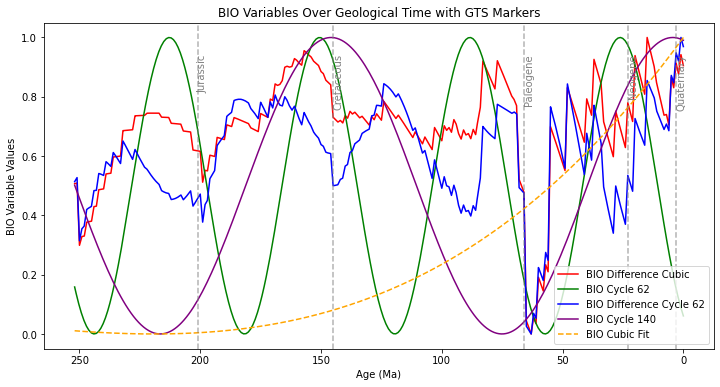

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define Geological Time Scale (GTS) Data for Vertical Markers
gts_data = pd.DataFrame([
    {'period': 'Quaternary', 'start': 3},
    {'period': 'Neogene', 'start': 23},
    {'period': 'Paleogene', 'start': 66},
    {'period': 'Cretaceous', 'start': 145},
    {'period': 'Jurassic', 'start': 201}
])

# Create a figure
plt.figure(figsize=(12, 6))

# Plot the BIO variables over Age
sns.lineplot(x=normalized_df['Age'], y=normalized_df['BIO_Difference_Cubic'], label="BIO Difference Cubic", color="red")
sns.lineplot(x=normalized_df['Age'], y=normalized_df['BIO_Cycle62'], label="BIO Cycle 62", color="green")
sns.lineplot(x=normalized_df['Age'], y=normalized_df['BIO_Difference_Cycle62'], label="BIO Difference Cycle 62", color="blue")
sns.lineplot(x=normalized_df['Age'], y=normalized_df['BIO_Cycle140'], label="BIO Cycle 140", color="purple")
sns.lineplot(x=normalized_df['Age'], y=normalized_df['BIO_CubicFit'], label="BIO Cubic Fit", color="orange", linestyle="dashed")

# Add Geological Time Scale (GTS) markers
for _, row in gts_data.iterrows():
    plt.axvline(x=row["start"], color='gray', linestyle='--', alpha=0.6)
    plt.text(row["start"], plt.ylim()[1] * 0.9, row["period"], rotation=90, verticalalignment='top', fontsize=10, color='gray')

# Customize the plot
plt.title("BIO Variables Over Geological Time with GTS Markers")
plt.xlabel("Age (Ma)")
plt.ylabel("BIO Variable Values")
plt.gca().invert_xaxis()  # Reverse x-axis to show the oldest time on the left
plt.legend()
plt.show()


In [117]:
print(normalized_df.columns.tolist())

['Age', 'BIO_AllGenera', 'BIO_Short-Lived', 'BIO_Long-Lived', 'BIO_Well-Resolved', 'BIO_ExtinctionIntensity (%)', 'BIO_OriginationIntensity(%)', 'BIO_Unnamed: 7', 'BIO_CubicFit', 'BIO_Difference_Cubic', 'BIO_Cycle62', 'BIO_Difference_Cycle62', 'BIO_Cycle140', 'SEA_Modern land sea level  (C = 176.6 106km2/km)', 'SEA_Haq (m)', 'SEA_Van der Meer (m)', 'SEA_Kocsis & Scotese (m)', 'SEA_Verard (m)', 'TEM_GAT', 'TEM_Tropical', 'TEM_Deep Ocean', 'TEM_Polar', 'TEM_dT', 'TEM_dTropical', 'CO2_pCO2 (ppm)', 'O2_Mid O2%', 'O2_Min O2%', 'O2_Max O2%', 'Diameter km', 'SR_87Sr/86Sr Mean', 'SR_87Sr/86Sr Min', 'SR_87Sr/86Sr Max', 'SR_Half-width interval', 'SR_Rate of Change', ' Total Area km^2', 'LIP_LIP_PDF', 'MAG_INT_mean', 'MAG_INT_std', 'MAG_INT_mode', 'MAG_INT_2.5%', 'MAG_INT_25%', 'MAG_INT_50%', 'MAG_INT_75%', 'MAG_INT_97.5%', 'Polarity', 'MAG_POL_FREQUENCY', 'MAG_POL_FREQUENCY.1', 'MAG_POL_FREQUENCY.2', 'MAG_POL_FREQUENCY.3', 'ZIR_Count_PDF_d18O', 'ZIR_Interpolated_mean_d18O', 'ZIR_Count_PDF_Hf', '

In [ ]:
'Age', 
'BIO_AllGenera', 'BIO_Short-Lived', 'BIO_Long-Lived', 'BIO_Well-Resolved', 'BIO_ExtinctionIntensity (%)', 'BIO_OriginationIntensity(%)', 'BIO_Unnamed: 7', 'BIO_CubicFit', 'BIO_Difference_Cubic', 'BIO_Cycle62', 'BIO_Difference_Cycle62', 'BIO_Cycle140', 
'SEA_Modern land sea level  (C = 176.6 106km2/km)', 'SEA_Haq (m)', 'SEA_Van der Meer (m)', 'SEA_Kocsis & Scotese (m)', 'SEA_Verard (m)', 
'TEM_GAT', 'TEM_Tropical', 'TEM_Deep Ocean', 'TEM_Polar', 'TEM_dT', 'TEM_dTropical', 
'CO2_pCO2 (ppm)', 
'O2_Mid O2%', 'O2_Min O2%', 'O2_Max O2%', 
'Diameter km', 
'SR_87Sr/86Sr Mean', 'SR_87Sr/86Sr Min', 'SR_87Sr/86Sr Max', 'SR_Half-width interval', 'SR_Rate of Change', 
' Total Area km^2', 
'LIP_LIP_PDF', 
'MAG_INT_mean', 'MAG_INT_std', 'MAG_INT_mode', 'MAG_INT_2.5%', 'MAG_INT_25%', 'MAG_INT_50%', 'MAG_INT_75%', 'MAG_INT_97.5%', 
'Polarity', 
'MAG_POL_FREQUENCY', 'MAG_POL_FREQUENCY.1', 'MAG_POL_FREQUENCY.2', 'MAG_POL_FREQUENCY.3', 
'ZIR_Count_PDF_d18O', 'ZIR_Interpolated_mean_d18O', 'ZIR_Count_PDF_Hf', 'ZIR_Interpolated_mean_Hf', 
'O2_Range', 'O2_Range_Normalized', 
'SR_Range', 'SR_Range_Normalized'


In [129]:
import pandas as pd

# Define the selected columns
selected_columns = [
    'Age', 
    'BIO_AllGenera', 'BIO_ExtinctionIntensity (%)', 'BIO_OriginationIntensity(%)',  
    'BIO_Difference_Cubic', 'BIO_Difference_Cycle62',
    'SEA_Modern land sea level  (C = 176.6 106km2/km)', 
    'TEM_GAT', 'TEM_dT', 
    'CO2_pCO2 (ppm)', 
    'O2_Mid O2%', 'O2_Range_Normalized',
    'SR_87Sr/86Sr Mean', 'SR_Range_Normalized',
    'LIP_LIP_PDF',
    'MAG_INT_mean', 'MAG_INT_std', 
    'ZIR_Count_PDF_d18O', 'ZIR_Interpolated_mean_d18O', 'ZIR_Count_PDF_Hf', 'ZIR_Interpolated_mean_Hf'
]

# Create a new DataFrame with only the selected columns
filtered_df = normalized_df[selected_columns]

# Export the filtered DataFrame to a CSV file
filtered_df.to_csv("filtered_data.csv", index=False)

# Confirm file creation
print("Filtered data has been successfully saved as 'filtered_data.csv'")


Filtered data has been successfully saved as 'filtered_data.csv'


In [130]:
filtered_df.describe()

Age  BIO_AllGenera  BIO_ExtinctionIntensity (%)  \
count  5041.000000    5041.000000                  5041.000000   
mean    126.000000       0.347225                     0.107271   
std      72.767784       0.269031                     0.119401   
min       0.000000       0.000000                     0.000000   
25%      63.000000       0.126447                     0.045086   
50%     126.000000       0.250615                     0.075135   
75%     189.000000       0.518827                     0.109380   
max     252.000000       1.000000                     1.000000   

       BIO_OriginationIntensity(%)  BIO_Difference_Cubic  \
count                  5041.000000           5041.000000   
mean                      0.336585              0.699811   
std                       0.201603              0.169501   
min                       0.000000              0.000000   
25%                       0.188275              0.661687   
50%                       0.308508              0.719109   
75%                       0.429500              0.785575   
max                       1.000000              1.000000   

       BIO_Difference_Cycle62  \
count             5041.000000   
mean                 0.607949   
std                  0.164378   
min                  0.000000   
25%                  0.494976   
50%                  0.624701   
75%                  0.742112   
max                  1.000000   

       SEA_Modern land sea level  (C = 176.6 106km2/km)      TEM_GAT  \
count                                       5041.000000  5041.000000   
mean                                           0.351779     0.422512   
std                                            0.273071     0.168538   
min                                            0.000000     0.000000   
25%                                            0.141558     0.315688   
50%                                            0.234427     0.415163   
75%                                            0.597687     0.529950   
max                                            1.000000     1.000000   

            TEM_dT  CO2_pCO2 (ppm)  ...  O2_Range_Normalized  \
count  5041.000000     5041.000000  ...          5041.000000   
mean      0.236280        0.197787  ...             0.399746   
std       0.200893        0.264011  ...             0.295374   
min       0.000000        0.000000  ...             0.000000   
25%       0.097587        0.045234  ...             0.153544   
50%       0.191952        0.088265  ...             0.310606   
75%       0.304124        0.177001  ...             0.593544   
max       1.000000        1.000000  ...             1.000000   

       SR_87Sr/86Sr Mean  SR_Range_Normalized  LIP_LIP_PDF  MAG_INT_mean  \
count        5041.000000          5041.000000  5041.000000   5040.000000   
mean            0.344499             0.197049     0.266277      0.260074   
std             0.204441             0.179275     0.228680      0.142987   
min             0.000000             0.000000     0.000000      0.000000   
25%             0.231136             0.065936     0.082000      0.179638   
50%             0.327876             0.121691     0.200000      0.227437   
75%             0.417705             0.266068     0.400000      0.339979   
max             1.000000             1.000000     1.000000      1.000000   

       MAG_INT_std  ZIR_Count_PDF_d18O  ZIR_Interpolated_mean_d18O  \
count  5040.000000         5041.000000                 5041.000000   
mean      0.385965            0.146409                    0.722555   
std       0.177479            0.162086                    0.160238   
min       0.000000            0.000000                    0.000000   
25%       0.252745            0.032814                    0.676473   
50%       0.363353            0.069784                    0.764074   
75%       0.497797            0.213723                    0.813271   
max       1.000000            1.000000                    1.000000   

       ZIR_Count_PDF_Hf  ZIR_Interpolat

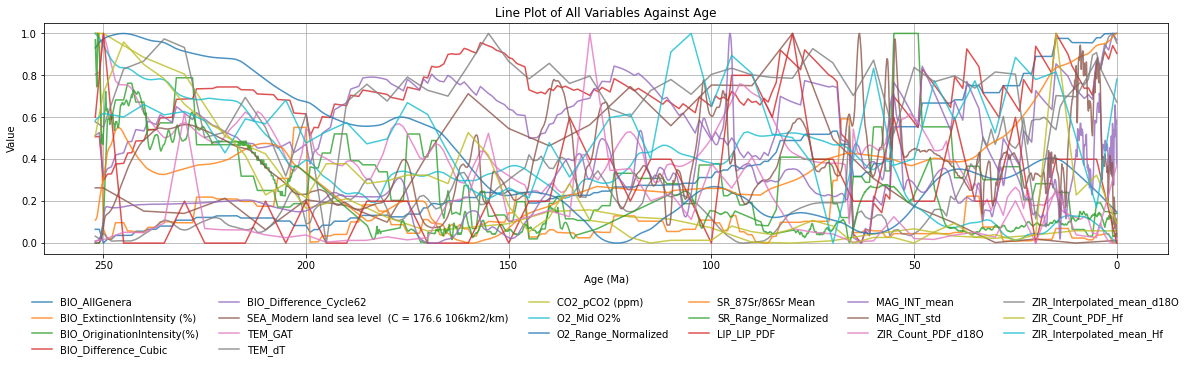

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure "Age" is in the dataset and drop non-numeric columns
if "Age" in filtered_df.columns:
    numeric_vars = filtered_df.select_dtypes(include=['number']).columns.drop("Age")
else:
    raise ValueError("The dataset does not contain an 'Age' column!")

# Step 2: Set up a **wider** plot
plt.figure(figsize=(18, 6))  # Adjust width (18) and height (6) for better clarity

# Loop through each variable and plot
for var in numeric_vars:
    sns.lineplot(x=filtered_df["Age"], y=filtered_df[var], label=var, alpha=0.8)

# Step 3: Formatting
plt.xlabel("Age (Ma)")
plt.ylabel("Value")
plt.title("Line Plot of All Variables Against Age")

# Reverse X-axis for geological time convention
plt.gca().invert_xaxis()

# Move legend **below** the plot
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=6, frameon=False)

# Adjust layout to fit everything properly
plt.grid(True)
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leaves space at the bottom for the legend

# Show the plot
plt.show()


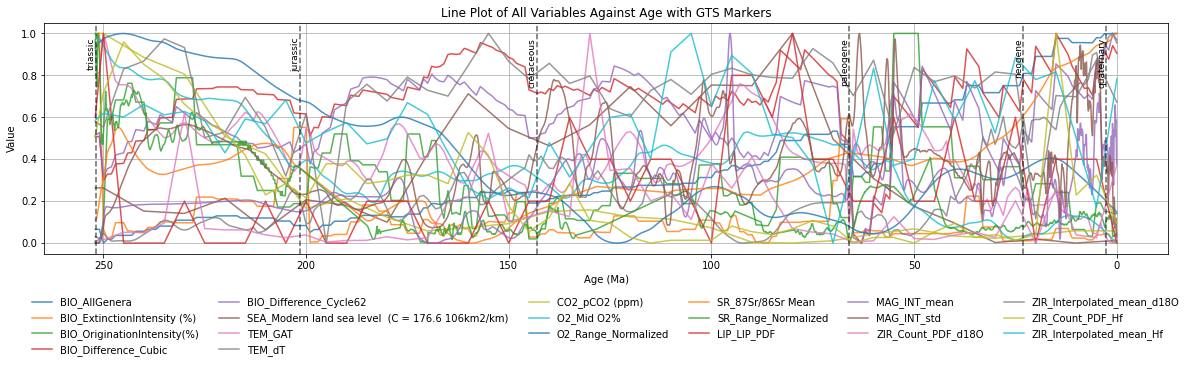

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure "Age" is in the dataset and drop non-numeric columns
if "Age" in filtered_df.columns:
    numeric_vars = filtered_df.select_dtypes(include=['number']).columns.drop("Age")
else:
    raise ValueError("The dataset does not contain an 'Age' column!")

# Step 2: Define GTS data
gts_data = pd.DataFrame([
    {'period': 'quaternary', 'start': 2.58},
    {'period': 'neogene', 'start': 23.04},
    {'period': 'paleogene', 'start': 66},
    {'period': 'cretaceous', 'start': 143.1},
    {'period': 'jurassic', 'start': 201.4},
    {'period': 'triassic', 'start': 251.9}
])

# Step 3: Set up a **wider** plot
plt.figure(figsize=(18, 6))  # Wider layout

# Plot each variable
for var in numeric_vars:
    sns.lineplot(x=filtered_df["Age"], y=filtered_df[var], label=var, alpha=0.8)

# Reverse X-axis (deep time on left)
plt.gca().invert_xaxis()

# Add GTS vertical lines and labels
y_max = filtered_df[numeric_vars].max().max()
for _, row in gts_data.iterrows():
    if row['start'] <= filtered_df["Age"].max():
        plt.axvline(x=row['start'], color='black', linestyle='--', alpha=0.6)
        plt.text(row['start'], y_max * 0.98, row['period'], rotation=90,
                 verticalalignment='top', horizontalalignment='right', fontsize=9)

# Axis labels and title
plt.xlabel("Age (Ma)")
plt.ylabel("Value")
plt.title("Line Plot of All Variables Against Age with GTS Markers")
plt.grid(True)

# Legend below the plot
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=6, frameon=False)

# Adjust layout to fit everything, including legend
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Reserve space at bottom

# Show the plot
plt.show()
